# ASSIGNMENT 4
# Submission Deadline: April 16, 6PM
# Submission Link: https://forms.gle/G4B6FiAsyoPLCkZu9  

# Table of Contents

1. [Provide Information](#Provide-Information)
2. [Instructions](#Instructions)
3. [Environment](#Environment)
4. [Hyperparameters](#Hyperparameters)
5. [Helper Functions](#helper)
6. [DDPG](#ddpg)
7. [TD3](#td3)
8. [PPO](#ppo)
9. [Experiments to Run](#experiments)

# Provide Information
<a id="Provide-Information"></a>

Name: **Rajarshi Dutta**

Roll No.: **200762**

IITK EMail: **rajarshi20@iitk.ac.in**

# Instructions
<a id="Instructions"></a>


**Read all the instructions below carefully before you start working on the assignment.**
- The purpose of this course is that you learn RL and the best way to do that is by implementation and experimentation.
- The assignment requires your to implement some algorithms and you are required report your findings after experimenting with those algorithms.
- **You are required to submit ZIP file containing a Jupyter notebook (.ipynb), and an image folder. The notebook would include the code, graphs/plots of the experiments you run and your findings/observations. Image folder is the folder having plots, images, etc.**
- In case you use any maths in your explanations, render it using latex in the Jupyter notebook.
- You are expected to implement algorithms on your own and not copy it from other sources/class mates. Of course, you can refer to lecture slides.
- If you use any reference or material (including code), please cite the source, else it will be considered plagiarism. But referring to other sources that directly solve the problems given in the assignment is not allowed. There is a limit to which you can refer to outside material.
- This is an individual assignment.
- In case your solution is found to have an overlap with solution by someone else (including external sources), all the parties involved will get zero in this and all future assignments plus further more penalties in the overall grade. We will check not just for lexical but also semantic overlap. Same applies for the code as well. Even an iota of cheating would NOT be tolerated. If you cheat one line or cheat one page the penalty would be same.
- Be a smart agent, think long term, if you cheat we will discover it somehow, the price you would be paying is not worth it.
- In case you are struggling with the assignment, seek help from TAs. Cheating is not an option! I respect honesty and would be lenient if you are not able to solve some questions due to difficulty in understanding. Remember we are there to help you out, seek help if something is difficult to understand.
- The deadline for the submission is given above. Submit at least 30 minutes before the deadline, lot can happen at the last moment, your internet can fail, there can be a power failure, you can be abducted by aliens, etc.
- You have to submit your assignment via the Google Form (link above)
- The form would close after the deadline and we will not accept any solution. No reason what-so-ever would be accepted for not being able to submit before the deadline.
- Since the assignment involves experimentation, reporting your results and observations, there is a lot of scope for creativity and innovation and presenting new perspectives. Such efforts would be highly appreciated and accordingly well rewarded. Be an exploratory agent!
- Your code should be very well documented, there are marks for that.
- In your plots, have a clear legend and clear lines, etc. Of course you would generating the plots in your code but you must also put these plots in your notebook. Generate high resolution pdf/svg version of the plots so that it doesn't pixilate on zooming.
- For all experiments, report about the seed used in the code documentation, write about the seed used.
- In your notebook write about all things that are not obvious from the code e.g., if you have made any assumptions, references/sources, running time, etc.
-  **DO NOT Forget to write name, roll no and email details above**
- **In addition to checking your code, we will be conducting one-on-one viva for the evaluation. So please make sure that you do not cheat!**
- **Use of LLMs based tools or AI-based code tools is strictly prohibited! Use of ChatGPT, VS Code, Gemini, CO-Pilot, etc. is not allowed. NOTE VS code is also not allowed. Even in Colab disable the AI assistant. If you use it, we will know it very easily. Use of any of the tools would be counted as cheating and would be given a ZERO, with no questions asked.**
- For each of the sub-part in the question create a new cell below the question and put your answer in there. This includes the plots as well

## Drive link to images: [https://drive.google.com/drive/folders/1_aEFvIwTzF_rgIV7u1cVhbM-lkix0BN_?usp=sharing](https://drive.google.com/drive/folders/1_aEFvIwTzF_rgIV7u1cVhbM-lkix0BN_?usp=sharing)

# OpenAI Gym Environments
<a id="Environment"></a>

In [ ]:
!pip install gymnasium
!pip install swig
!pip install gymnasium[box2d]
!pip install gymnasium[mujoco]
!pip install pygame


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
  Using cached swig-4.2.1-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl.metadata (3.6 kB)
Using cached swig-4.2.1-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.9 MB)

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
  Using cached box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl
  Using cached pygame-2.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached pygame-2.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.0 MB)

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
  Using cached etils-1.7.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached glfw-2.7.0-py2.py27.py3.py30.py31.py32.py33.py34.py35.py36.py37

In [ ]:
# all imports go in here
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pygame
import swig
import time
from tqdm import tqdm
import random
from itertools import count, cycle

In this assignment we will be exploring Deep RL algorithms and for this we will be using environmentd provided by OpenAI Gym. In particular we will be exploring "Pendulum-v1" , "Hopper-v4", and "Half-Cheetah" environments (https://gymnasium.farama.org/environments/classic_control/ ). The code to instantiate the environments are given in the cells below. Run these cells and play with the environments to learn more details about the environments.

In [ ]:
# Create Inverted Pendulum environment
#https://gymnasium.farama.org/environments/classic_control/cart_pole/

env = gym.make('Pendulum-v1', render_mode="rgb_array")
s = env.reset(seed = 34)
print("Observation Space = ")
print(env.observation_space)
print("Action Space = ")
print(env.action_space)
done = False
for episode in range(20):
    print("In episode {}".format(episode))
    for i in range(100):
        env.render()
        print(s)
        a = env.action_space.sample()
        s, r, done, truncated, _ = env.step(a)
        if done:
            print("Finished after {} timestep".format(i+1))
env.close()

Observation Space = 
Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)
Action Space = 
Box(-2.0, 2.0, (1,), float32)
In episode 0
(array([-0.9996797 , -0.0253075 ,  0.74435383], dtype=float32), {})
[-0.9976978 -0.0678168  0.8511738]
[-0.9924942  -0.12229165  1.0945929 ]
[-0.9865838  -0.16325538  0.8278174 ]
[-0.9808892 -0.1945672  0.6365359]
[-0.9728892  -0.23127176  0.75136966]
[-0.96463203 -0.26360017  0.667356  ]
[-0.95803165 -0.28666243  0.47977477]
[-0.95526946 -0.29573682  0.18971066]
[-0.9551748  -0.29604235  0.0063967 ]
[-0.96069074 -0.2776208  -0.38459867]
[-0.97153306 -0.236904   -0.84277546]
[-0.98350316 -0.18089084 -1.1457144 ]
[-0.9920007  -0.12623219 -1.106446  ]
[-0.9979522  -0.06396396 -1.2512441 ]
[-0.9999364   0.01127675 -1.5056928 ]
[-0.9966541   0.08173469 -1.4109799 ]
[-0.98753047  0.15742782 -1.5251895 ]
[-0.9748282   0.22295745 -1.3352357 ]
[-0.95966434  0.28114823 -1.2028627 ]
[-0.9462967   0.32329947 -0.88447505]
[-0.9308374  0.3654336 -0.8976892]
[-0.9207943   0.3

[-0.9743737   0.22493534  1.355372  ]
[-0.986332    0.16477011  1.2270349 ]
[-0.99443626  0.10533987  1.1997855 ]
[-0.99896175  0.04555702  1.1992575 ]
[-0.9999095  -0.01345003  1.1804646 ]
[-0.99669296 -0.08125961  1.3579773 ]
[-0.9904063  -0.13818622  1.1456103 ]
[-0.97902566 -0.20373699  1.3308728 ]
[-0.96625614 -0.25758323  1.1069347 ]
[-0.95361316 -0.30103475  0.9051472 ]
[-0.9461884  -0.32361642  0.4754306 ]
[-0.9422196  -0.33499575  0.24103278]
[-0.9424366  -0.33438498 -0.01296306]
[-0.9453939  -0.32593    -0.17914616]
[-0.950647   -0.3102745  -0.33026955]
[-0.9602073  -0.27928832 -0.64857846]
[-0.9692504  -0.24607669 -0.68844974]
[-0.97899866 -0.20386656 -0.8664914 ]
[-0.99019885 -0.13966466 -1.303661  ]
[-0.99668574 -0.08134805 -1.1736944 ]
[-0.9996691  -0.02572481 -1.1142077 ]
[-0.99921435  0.03963132 -1.307387  ]
[-0.99541163  0.09568524 -1.1238031 ]
[-0.9880093  0.1543944 -1.1836525]
[-0.9781962   0.20768283 -1.0838212 ]
[-0.96731913  0.253562   -0.9431057 ]
[-0.95525146  0

In [ ]:

# !pip install gymnasium
# !pip install swig
# !pip install gymnasium[box2d]
# !pip install gymnasium[mujoco]

# Create Hopper environment
# https://gymnasium.farama.org/environments/mujoco/hopper/

env = gym.make('Hopper-v4')
#env.seed(34)
s = env.reset(seed=344)
print("Observation Space = ")
print(env.observation_space)
print("Action Space = ")
print(env.action_space.high)
done = False
for episode in range(1):
    s = env.reset(seed = 344)
    print("In episode {}".format(episode))
    re = 0
    for i in range(200):
        a = env.action_space.sample()
        s, r, done, truncated,_ = env.step(a)
        re += r
        if done or truncated:
            break
    print("Finished after {} timestep".format(i+1))
    print("Reward {}".format(re))
env.close()

Observation Space = 
Box(-inf, inf, (11,), float64)
Action Space = 
[1. 1. 1.]
In episode 0
Finished after 16 timestep
Reward 15.212116081188721


In [ ]:
# Create Half-Cheetah environment
# https://gymnasium.farama.org/environments/mujoco/hopper/

env = gym.make('HalfCheetah-v4')
#env.seed(34)
s = env.reset(seed=344)
print("Observation Space = ")
print(env.observation_space)
print("Action Space = ")
print(env.action_space.high)
done = False
for episode in range(1):
    s = env.reset(seed = 344)
    print("In episode {}".format(episode))
    re = 0
    for i in range(200):
        a = env.action_space.sample()
        s, r, done, truncated,_ = env.step(a)
        re += r
        if done or truncated:
            break
    print("Finished after {} timestep".format(i+1))
    print("Reward {}".format(re))
env.close()


Observation Space = 
Box(-inf, inf, (17,), float64)
Action Space = 
[1. 1. 1. 1. 1. 1.]
In episode 0
Finished after 200 timestep
Reward -73.71306374239998


# Hyperparameters
<a id="Hyperparameters"></a>

All your hyperparameters should be stated here. We will change their value here and your code should work  accordingly.

In [ ]:
# mention the values of all the hyperparameters (you can add more hyper-paramters as well) to be used in the entire notebook, put the values that gave the best
# performance and were finally used for the agent

gamma = 0.99
noiseScaleRatio = 1.5
minSamples = 500
epocs = 20
tau = 0.3



MAX_TRAIN_EPISODES = 120
MAX_EVAL_EPISODES = 1
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Helper Functions
<a id="helper"></a>

Write all the helper functions that will be used for value-based and policy based algorithms below. In case you want to add more helper functions, please feel free to add.

In [ ]:
#Value Network
def createValueNetwork(inDim, outDim, hDim=[32, 32], activation=F.relu):
    #this creates a Feed Forward Neural Network class and instantiates it and returns the class
    #the class should be derived from torch nn.Module and it should have init and forward method at the very least
    #the forward function should return q-value for each possible action
    class ValueNetwork(nn.Module):
        def __init__(self, input_dim, output_dim, hidden_dims, activation_fc):
            super(ValueNetwork, self).__init__()
            self.activation_fc = activation_fc

            self.first_layer = nn.Linear(input_dim, hidden_dims[0])
            self.second_layer = nn.Linear(hidden_dims[0] + output_dim, hidden_dims[1])
            self.hidden_layers = nn.ModuleList()
            for i in range(1, len(hidden_dims) - 1):
                self.hidden_layers.append(nn.Linear(hidden_dims[i], hidden_dims[i + 1]))
            self.output_layer = nn.Linear(hidden_dims[-1], output_dim)

            self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            self.to(self.device)

        def _format(self, state, action=None):
            if not isinstance(state, torch.Tensor):
                state = torch.tensor(state, dtype=torch.float32, device=self.device)
            if state.dim() == 1:
                state = state.unsqueeze(0)

            if action is not None:
                if not isinstance(action, torch.Tensor):
                    action = torch.tensor(action, dtype=torch.float32, device=self.device)
                if action.dim() == 1:
                    action = action.unsqueeze(0)
            return state, action

        def forward(self, state, action):
            state, action = self._format(state, action)
            x = self.activation_fc(self.first_layer(state))
            x = torch.cat((x, action), dim=-1)
            x = self.activation_fc(self.second_layer(x))
            for hidden_layer in self.hidden_layers:
                x = self.activation_fc(hidden_layer(x))
            x = self.output_layer(x)
            return x


        def load(self, experiences):
            states, actions, rewards, new_states, is_terminals = experiences
            states = torch.from_numpy(states).float().to(self.device)
            actions = torch.from_numpy(actions).long().to(self.device)
            new_states = torch.from_numpy(new_states).float().to(self.device)
            rewards = torch.from_numpy(rewards).float().to(self.device)
            is_terminals = torch.from_numpy(is_terminals).float().to(self.device)
            return states, actions, rewards, new_states, is_terminals

    return ValueNetwork(inDim, outDim, hDim, activation)

In [ ]:
#Value Network
def createValueNetwork_TD3(inDim, outDim, hDim=[32, 32], activation=F.relu):
    #this creates a Feed Forward Neural Network class and instantiates it and returns the class
    #the class should be derived from torch nn.Module and it should have init and forward method at the very least
    #the forward function should return q-value for each possible action
    class ValueNetwork(nn.Module):
        def __init__(self, input_dim, output_dim, hidden_dims, activation_fc):
            super(ValueNetwork, self).__init__()
            self.activation_fc = activation_fc

            # first network
            self.first_layer1 = nn.Linear(input_dim, hidden_dims[0])
            self.second_layer1 = nn.Linear(hidden_dims[0] + output_dim, hidden_dims[1])
            self.hidden_layers1 = nn.ModuleList()
            for i in range(1, len(hidden_dims) - 1):
                self.hidden_layers1.append(nn.Linear(hidden_dims[i], hidden_dims[i + 1]))
            self.output_layer1 = nn.Linear(hidden_dims[-1], output_dim)

            # second network
            self.first_layer2 = nn.Linear(input_dim, hidden_dims[0])
            self.second_layer2 = nn.Linear(hidden_dims[0] + output_dim, hidden_dims[1])
            self.hidden_layers2 = nn.ModuleList()
            for i in range(1, len(hidden_dims) - 1):
                self.hidden_layers2.append(nn.Linear(hidden_dims[i], hidden_dims[i + 1]))
            self.output_layer2 = nn.Linear(hidden_dims[-1], output_dim)

            self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            self.to(self.device)

        def _format(self, state, action=None):
            if not isinstance(state, torch.Tensor):
                state = torch.tensor(state, dtype=torch.float32, device=self.device)
            if state.dim() == 1:
                state = state.unsqueeze(0)

            if action is not None:
                if not isinstance(action, torch.Tensor):
                    action = torch.tensor(action, dtype=torch.float32, device=self.device)
                if action.dim() == 1:
                    action = action.unsqueeze(0)
            return state, action

        def forward(self, state, action):
            state1, action = self._format(state, action)
            q1 = self.activation_fc(self.first_layer1(state1))
            q1 = torch.cat((q1, action), dim=-1)
            q1 = self.activation_fc(self.second_layer1(q1))
            for hidden_layer1 in self.hidden_layers1:
                q1 = self.activation_fc(hidden_layer1(q1))
            q1 = self.output_layer1(q1)

            # second network pass
            state2, action = self._format(state, action)
            q2 = self.activation_fc(self.first_layer2(state2))
            q2 = torch.cat((q2, action), dim=-1)
            q2 = self.activation_fc(self.second_layer2(q2))
            for hidden_layer2 in self.hidden_layers1:
                q2 = self.activation_fc(hidden_layer2(q2))
            q2 = self.output_layer2(q2)

            return q1, q2


        def load(self, experiences):
            states, actions, rewards, new_states, is_terminals = experiences
            states = torch.from_numpy(states).float().to(self.device)
            actions = torch.from_numpy(actions).long().to(self.device)
            new_states = torch.from_numpy(new_states).float().to(self.device)
            rewards = torch.from_numpy(rewards).float().to(self.device)
            is_terminals = torch.from_numpy(is_terminals).float().to(self.device)
            return states, actions, rewards, new_states, is_terminals

    return ValueNetwork(inDim, outDim, hDim, activation)

In [ ]:
#Policy Network
def createPolicyNetwork(inDim, outDim, envActionRange = (-1, 1), hDim = [32,32], activation = F.relu):
    #this creates a Feed Forward Neural Network class and instantiates it and returns the class
    #the class should be derived from torch nn.Module and it should have init and forward method at the very least
    #the forward function should return action logit vector
    #Your code goes in here

    class policyNetwork(nn.Module):
        def __init__(self, input_dim, output_dim, envActionRange, num_outputs, hidden_dims, activation_fn):
            super(policyNetwork, self).__init__()
            self.activation_fn = activation_fn
            self.envActionRange = envActionRange

            self.layers = nn.ModuleList()
            self.layers.append(nn.Linear(input_dim, hidden_dims[0]))
            for i in range(len(hidden_dims)-1):
                self.layers.append(nn.Linear(hidden_dims[i], hidden_dims[i+1]))
            self.layers.append(nn.Linear(hidden_dims[-1], output_dim))

            self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        def _format(self, state):
            if not isinstance(state, torch.Tensor):
                state = torch.tensor(state, dtype=torch.float32)
            if state.dim() == 1:
                state = state.unsqueeze(0)
            return state

        def forward(self, x):
            min_action, max_action = self.envActionRange
            x = self._format(x)
            for layer in self.layers[:-1]:
                x = self.activation_fn(layer(x))
            x = F.tanh(self.layers[-1](x))

            actions = (x + 1.0) * ((max_action - min_action)/(torch.tensor(2.0))) + torch.tensor(min_action)

            return actions

    return policyNetwork(inDim, outDim, envActionRange, envActionRange[0].shape[0], hDim, activation)

In [ ]:
# policy network for PPO
def createPolicyNetworkPPO(inDim, outDim, envActionRange = (-1, 1), hDim = [32,32], activation = F.relu):
    #this creates a Feed Forward Neural Network class and instantiates it and returns the class
    #the class should be derived from torch nn.Module and it should have init and forward method at the very least
    #the forward function should return action logit vector
    #Your code goes in here

    class policyNetwork(nn.Module):
        def __init__(self, input_dim, output_dim, envActionRange, num_outputs, hidden_dims, activation_fn):
            super(policyNetwork, self).__init__()
            self.activation_fn = activation_fn
            self.envActionRange = envActionRange

            self.layers = nn.ModuleList()
            self.layers.append(nn.Linear(input_dim, hidden_dims[0]))
            for i in range(len(hidden_dims)-1):
                self.layers.append(nn.Linear(hidden_dims[i], hidden_dims[i+1]))
            # self.layers.append(nn.Linear(hidden_dims[-1], output_dim))
            self.mean_layer = nn.Linear(hidden_dims[-1], output_dim)
            self.log_std_layer = nn.Parameter(torch.zeros(output_dim))

            self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


        def _format(self, state):
            if not isinstance(state, torch.Tensor):
                state = torch.tensor(state, dtype=torch.float32)
            if state.dim() == 1:
                state = state.unsqueeze(0)
            return state

        def forward(self, x):
            x = self._format(x)
            for layer in self.layers:
                x = self.activation_fn(layer(x))
            mean = self.mean_layer(x)
            std = torch.exp(self.log_std_layer.clamp(-20, 2))
            normal = torch.distributions.Normal(mean, std)
            actions = normal.sample()
            log_probs = normal.log_prob(actions)

            min_action, max_action = self.envActionRange
            min_action = torch.tensor(min_action, device=self.device, dtype=torch.float32)
            max_action = torch.tensor(max_action, device=self.device, dtype=torch.float32)
            actions = torch.tanh(actions)
            actions = (actions + 1.0) / 2.0 * (max_action - min_action) + min_action
            actions = actions.view(-1, 1)
            # log_probs = log_probs.view(-1, 1)

            return actions, log_probs, normal.entropy()


    return policyNetwork(inDim, outDim, envActionRange, envActionRange[0].shape[0], hDim, activation)

In [ ]:
def reset_env(env, seed=None, options=None):
    # Reset the environment with seed and options, handling new seeding mechanism
    initial_observation, info = env.reset(seed=seed, options=options)
    return initial_observation, info

## ReplayBuffer

In next few cells, you will implement replaybuffer class.

This class creates a buffer for storing and retrieving experiences. This is a generic class and can be used
for different agents like NFQ, DQN, DDQN, PER_DDQN, etc.
Following are the methods for this class which are implemented in subsequent cells

```
class ReplayBuffer():
    def __init__(self, bufferSize, batch_size, seed)
    def store(self, state, action, reward, next_state, done)
    def sample(self, batchSize)
    def length(self)
```   

In [ ]:
class ReplayBuffer():
    def __init__(self, bufferSize, bufferType = 'DQN', **kwargs):
        # this function creates the relevant data-structures, and intializes all relevant variables
        # it can take variable number of parameters like alpha, beta, beta_rate (required for PER)
        # here the bufferType variable can be used to maintain one class for all types of agents
        # using the bufferType parameter in the methods below, you can implement all possible functionalities
        # that could be used for different types of agents
        # permissible values for bufferType = NFQ, DQN, DDQN, D3QN and PER-D3QN

        #Your code goes in here
        self.ss_mem = np.empty(shape=(bufferSize), dtype=np.ndarray)
        self.as_mem = np.empty(shape=(bufferSize), dtype=np.ndarray)
        self.rs_mem = np.empty(shape=(bufferSize), dtype=np.ndarray)
        self.ps_mem = np.empty(shape=(bufferSize), dtype=np.ndarray)
        self.ds_mem = np.empty(shape=(bufferSize), dtype=np.ndarray)

        self.max_size = bufferSize
        self.bufferType = bufferType
        self._idx = 0
        self.size = 0
        # Assume default batch size for sampling if not provided
        self.default_batch_size = 64

        return

In [ ]:
class ReplayBuffer(ReplayBuffer):
    def store(self, experience):
        #stores the experiences, based on parameters in init it can assign priorities, etc.
        #
        #this functacion does not return anything
        #
        #Your code goes in here
        if(self.bufferType == "D3QN-PER"):
            priority = 1.0
            if self.n_entries > 0:
                priority = self.memory[
                    :self.n_entries,
                    self.td_error_index].max()
            self.memory[self.next_index,
                        self.td_error_index] = priority
            self.memory[self.next_index,
                        self.sample_index] = np.array(experience, dtype = 'object')
            self.n_entries = min(self.n_entries + 1, self.max_samples)
            self.next_index += 1
            self.next_index = self.next_index % self.max_samples

        else:

            s, a, r, p, d = experience
            self.ss_mem[self._idx] = s
            self.as_mem[self._idx] = a
            self.rs_mem[self._idx] = r
            self.ps_mem[self._idx] = p
            self.ds_mem[self._idx] = d

            self._idx = (self._idx + 1) % self.max_size
            self.size = min(self.size + 1, self.max_size)

        return

In [ ]:
class ReplayBuffer(ReplayBuffer):
    def collectExperiences(env, state, explorationStrategy, countExperiences, net = None):
        #this method allows the agent to interact with the environment starting from a state and it collects
        #experiences during the interaction, it uses network to get the value function and uses exploration strategy
        #to select action. It collects countExperiences and in case the environment terminates before that it returns
        #the function calling this method needs to handle early termination accordingly.
        #
        #this function does not return anything
        #
        #Your code goes in here
        experiences = []
        for _ in range(countExperiences):
            action = explorationStrategy(state, net)  # Assuming explorationStrategy uses net
            next_state, reward, done, _ = env.step(action)
            experiences.append((state, action, reward, next_state, done))
            if done:
                break
            state = next_state
        return experiences

In [ ]:
class ReplayBuffer(ReplayBuffer):
    def sample(self, batchSize=None, **kwargs):
        # this method returns batchSize number of experiences
        # based on extra arguments, it could do sampling or it could return the latest batchSize experiences or
        # via some other strategy
        #
        # in the case of Prioritized Experience Replay (PER) the sampling needs to take into account the priorities
        #
        # this function returns experiences samples
        #
        #Your code goes in here
        if batchSize is None:
            batchSize = self.default_batch_size
        idxs = np.random.choice(self.size, batchSize, replace=False)
        experiences = (np.vstack(self.ss_mem[idxs]), \
                        np.vstack(self.as_mem[idxs]), \
                        np.vstack(self.rs_mem[idxs]), \
                        np.vstack(self.ps_mem[idxs]), \
                        np.vstack(self.ds_mem[idxs]))
        return experiences

In [ ]:
class ReplayBuffer(ReplayBuffer):
    def splitExperiences(self, experiences):
        #it takes in experiences and gives the following:
        #states, actions, rewards, nextStates, dones
        #
        #Your code goes in here
        states, actions, rewards, nextStates, dones = experiences
        return states, actions, rewards, nextStates, dones

In [ ]:
class ReplayBuffer(ReplayBuffer):
    def length(self):
        #tells the number of experiences stored in the internal buffe
        return self.size

## Deep Deterministic Policy Gradient (DDPG) ##
<a id="ddpg"></a>

Implement the Deep Deterministic Policy Gradient (DDPG) agent. We have studied about DDPG agent in the Lecture. Use the function definitions (given below).

This class implements the DDPG agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible Gym environment

```
class DDPG():
    def init(self, env, seed, gamma, tau, bufferSize, batch_size, updateFrequency,
             policyOptimizerFn, valueOptimizerFn,
             policyOptimizerLR,valueOptimizerLR,
             MAX_TRAIN_EPISODES,MAX_EVAL_EPISODE,
             optimizerFn)
    
    def runDDPG(self)
    def trainAgent(self)
    def gaussianStrategy(self, net , s , envActionRange , noiseScaleRatio,
        explorationMax = True)
    def greedyStrategy(self, net , s , envActionRange)
    def trainNetworks(self, experiences)
    def updateNetworks(self, onlineNet, targetNet, tau)
    def evaluateAgent(self)




```

In [ ]:
class DDPG():
    def __init__(self, env_id, seed, gamma,
                 tau,
                 epochs,
                 bufferSize,
                 batchSize,
                 updateFrequency,
                 valueOptimizerFn,
                 valueOptimizerLR,
                 policyOptimizerFn,
                 policyOptimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES):
        #this DQN method
        # 1. creates and initializes (with seed) the environment, train/eval episodes, gamma, etc.
        # 2. creates and intializes all the variables required for book-keeping values via the initBookKeeping method
        # 3. creates traget and online Q-networks using the createValueNetwork above
        # 4. creates and initializes (with network params) the optimizer function
        # 5. sets the explorationStartegy variables/functions for train and evaluation
        # 6. sets the batchSize for the number of experiences
        # 7. Creates the replayBuffer

        # 1. Environment initialization using env_id

        self.env = gym.make(env_id)
        self.seed = seed
        reset_env(self.env, seed=seed)  # Seed the environment (affects environment operations)

        # Note on seeding:
        # Seeding affects global state for NumPy and PyTorch, which might impact other parts of an application.
        # It's set here for reproducibility within the scope of this NFQ instance's operations.
        torch.manual_seed(seed)  # Seed PyTorch (global effect)
        np.random.seed(seed)  # Seed NumPy (global effect)
        random.seed(seed)

        self.envActionRange = (self.env.action_space.low, self.env.action_space.high)
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        inDim = self.env.observation_space.shape[0]
        outDim = self.env.action_space.shape[0]
        hDim = [512,128]
        activation = torch.nn.functional.relu

        self.targetValueNetwork = createValueNetwork(inDim, outDim, hDim, activation)
        self.onlineValueNetwork = createValueNetwork(inDim, outDim, hDim, activation)

        self.targetPolicyNetwork = createPolicyNetwork(inDim, outDim, self.envActionRange, hDim, activation)
        self.onlinePolicyNetwork = createPolicyNetwork(inDim, outDim, self.envActionRange, hDim, activation)
        self.valueOptimizer = valueOptimizerFn(self.onlineValueNetwork, valueOptimizerLR)
        self.policyOptimizer = policyOptimizerFn(self.onlinePolicyNetwork, policyOptimizerLR)

        self.tau = tau
        self.gamma = gamma
        self.epochs = epochs
        self.batchSize = batchSize
        self.MAX_TRAIN_EPISODES = MAX_TRAIN_EPISODES
        self.MAX_EVAL_EPISODES = MAX_EVAL_EPISODES
        self.updateFrequency = updateFrequency

        self.replay_buffer_fn = lambda: ReplayBuffer(bufferSize=50000)

In [ ]:
class DDPG(DDPG):
    def stepint(self, state, env):
        action = self.gaussianSelectAction(self.onlinePolicyNetwork, state, noiseScaleRatio = 1.5, explorationMax = self.replay_buffer.length() > self.min_samples)
        new_state, reward, is_terminal, is_truncated, info = env.step(action)
        is_failure = is_terminal and not is_truncated
        experience = (state, action, reward, new_state, float(is_failure))

        self.replay_buffer.store(experience)
        self.episode_reward[-1] += reward
        self.episode_timestep[-1] += 1
        return new_state, is_terminal

In [ ]:
class DDPG(DDPG):
    def updateNetworks(self):
        for tParam, oParam in zip(self.targetValueNetwork.parameters(),
                                  self.onlineValueNetwork.parameters()):
            mixedWeights = (1 - self.tau) * tParam.data + self.tau * oParam.data
            tParam.data.copy_(mixedWeights)

        for tParam, oParam in zip(self.targetPolicyNetwork.parameters(),
                                  self.onlinePolicyNetwork.parameters()):
            mixedWeights = (1 - self.tau) * tParam.data + self.tau * oParam.data
            tParam.data.copy_(mixedWeights)

In [ ]:
class DDPG(DDPG):
    def gaussianSelectAction(self, net, s, noiseScaleRatio, explorationMax = True):
        actionLowVal, actionHighVal = self.envActionRange
        if explorationMax:
            scale = actionHighVal
        else:
            scale = noiseScaleRatio * actionHighVal
        greedyAction = net(s).cpu().detach().squeeze().numpy()
        noise = np.random.normal(loc=0, scale=scale, size=len(actionHighVal))
        action = greedyAction + noise
        action = np.clip(action, actionLowVal, actionHighVal)

        return action

In [ ]:
class DDPG(DDPG):
    def greedySelectAction(self, net, s):
        actionLowVal, actionHighVal = self.envActionRange
        action = net(s).cpu().detach().squeeze().numpy()
        action = np.clip(action, actionLowVal, actionHighVal)

        return action

In [ ]:
class DDPG(DDPG):
    def runDDPG(self):
        #this is the main method, it trains the agent, performs bookkeeping while training and finally evaluates
        #the agent and returns the following quantities:
        #1. episode wise mean train rewards
        #2. epsiode wise mean eval rewards
        #2. episode wise trainTime (in seconds): time elapsed during training since the start of the first episode
        #3. episode wise wallClockTime (in seconds): actual time elapsed since the start of training,
        #                               note this will include time for BookKeeping and evaluation
        # Note both trainTime and wallClockTime get accumulated as episodes proceed.
        #
        #Your code goes in here
        resultList, trainTimeList, evalRewardsList, wallClockTimeList = self.trainAgent()
        resultEval = self.evaluateAgent()
        finalEvalReward  = np.mean(resultEval)

        return resultList, trainTimeList, evalRewardsList, wallClockTimeList, finalEvalReward

In [ ]:
class DDPG(DDPG):
    def trainAgent(self):
        # this method collects experiences and trains the agent and does BookKeeping while training.
        # this calls the trainNetwork() method internally, it also evaluates the agent per episode
        # it trains the agent for MAX_TRAIN_EPISODES
        training_start = time.time()
        torch.manual_seed(self.seed)
        np.random.seed(self.seed)
        random.seed(self.seed)
        self.episode_timestep = []
        self.episode_reward = []
        self.episode_seconds = []
        self.evaluation_scores = []
        self.episode_exploration = []
        global train_count
        train_count +=1

        self.updateNetworks()

        self.replay_buffer = self.replay_buffer_fn()
        tempstate, _ = self.env.reset(seed=self.seed)

        max_episodes = self.MAX_TRAIN_EPISODES
        result = np.empty((2000, 5))
        result[:] = np.nan
        training_time = 0

        for episode in tqdm(range(1, max_episodes + 1)):
            episode_start = time.time()
            state, _ = self.env.reset(seed=self.seed)
            self.episode_reward.append(0.0)
            self.episode_timestep.append(0.0)
            self.episode_exploration.append(0.0)

            for step in range(self.env.spec.max_episode_steps):
                self.min_samples = self.replay_buffer.default_batch_size * self.batchSize
                state, is_terminal = self.stepint(state, self.env)

                if self.replay_buffer.length() > self.min_samples:
                    experiences = self.replay_buffer.sample(batchSize = self.batchSize)
                    experiences = self.onlineValueNetwork.load(experiences)
                    self.trainNetworks(experiences, self.epochs)

                if np.sum(self.episode_timestep) % self.updateFrequency == 0:
                    self.updateNetworks()

                if is_terminal:
                    break

            episode_elapsed = time.time() - episode_start
            self.episode_seconds.append(episode_elapsed)
            training_time += episode_elapsed
            evaluation_score = np.mean(self.evaluateAgent())
            total_step = int(np.sum(self.episode_timestep))
            self.evaluation_scores.append(evaluation_score)

            mean_10_reward = np.mean(self.episode_reward[-10:])
            std_10_reward = np.std(self.episode_reward[-10:])
            mean_100_reward = np.mean(self.episode_reward[-100:])
            std_100_reward = np.std(self.episode_reward[-100:])
            mean_100_eval_score = np.mean(self.evaluation_scores[-100:])
            std_100_eval_score = np.std(self.evaluation_scores[-100:])

            wallclock_elapsed = time.time() - training_start
            result[episode - 1] = total_step, mean_100_reward, mean_100_eval_score, training_time, wallclock_elapsed

        final_eval_rwd_list = self.evaluateAgent()
        mean_eval_rwd = np.mean(final_eval_rwd_list)
        wallclock_time = time.time() - training_start
        self.env.close()

        return result, training_time, final_eval_rwd_list, wallclock_time


In [ ]:
class DDPG(DDPG):
    def trainNetworks(self, experiences, epochs):
        # this method trains the value network epoch number of times and is called by the trainAgent function
        # it essentially uses the experiences to calculate target, using the targets it calculates the error, which
        # is further used for calulating the loss. It then uses the optimizer over the loss
        # to update the params of the network by backpropagating through the network
        # this function does not return anything
        # you can try out other loss functions other than MSE like Huber loss, MAE, etc.
        #
        #Your code goes in here
        states, actions, rewards, next_states, is_terminals = experiences
        batch_size = len(is_terminals)
        next_states_cpu = next_states.cpu().detach().numpy()
        argmax_a_qs_v = self.targetPolicyNetwork(next_states_cpu).to(device)
        max_a_qs_v = self.targetValueNetwork(next_states, argmax_a_qs_v)

        target_qs = rewards + (self.gamma * max_a_qs_v * (1 - is_terminals))

        qs = self.onlineValueNetwork(states, actions)

        td_errors = target_qs.detach() - qs
        value_loss = td_errors.pow(2).mul(0.5).mean()
        self.valueOptimizer.zero_grad()
        value_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.onlineValueNetwork.parameters(), 1.0)
        self.valueOptimizer.step()

        argmax_a_qs_p = self.onlinePolicyNetwork(next_states_cpu).to(device)
        max_a_qs_p = self.onlineValueNetwork(next_states, argmax_a_qs_p)

        policyLoss = max_a_qs_p.mean().mul(-1.0)
        self.policyOptimizer.zero_grad()
        policyLoss.backward()
        torch.nn.utils.clip_grad_norm_(self.onlinePolicyNetwork.parameters(), 1.0)
        self.policyOptimizer.step()

        return

In [ ]:
class DDPG(DDPG):
    def evaluateAgent(self):
        #this function evaluates the agent using the value network, it evaluates agent for MAX_EVAL_EPISODES
        #typcially MAX_EVAL_EPISODES = 1
        rwd_list = []
        for _ in range(self.MAX_EVAL_EPISODES):
            state, _ = self.env.reset(seed=self.seed)
            rwd_list.append(0)
            for _ in count():
                action = self.greedySelectAction(self.onlinePolicyNetwork, state)
                state, rwd, done, truncated,_ = self.env.step(action)
                rwd_list[-1] += rwd
                if done or truncated: break
        return rwd_list

In [ ]:
# train_count = 0
# ddpg_results = []
# best_agent, best_eval_score = None, float('-inf')
# seed_list = [3]

# for myseed in seed_list:

#     val_optimizer_fn = lambda net, lr: optim.RMSprop(net.parameters(), lr=lr)
#     pol_optimizer_fn = lambda net, lr: optim.RMSprop(net.parameters(), lr=lr)

#     # Instantiation of the DQN class
#     ddpg_instance = DDPG(
#         env_id='Pendulum-v1',
#         seed=myseed,
#         gamma=0.99,
#         tau = 0.8,
#         epochs = 15,
#         bufferSize=60000,
#         batchSize=5,
#         updateFrequency = 20,
#         valueOptimizerFn=val_optimizer_fn,
#         valueOptimizerLR=1e-3,
#         policyOptimizerFn=pol_optimizer_fn,
#         policyOptimizerLR=1e-3,
#         MAX_TRAIN_EPISODES=100,
#         MAX_EVAL_EPISODES=5
#     )

#     # Running the NFQ method and appending results
#     trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, final_eval_score = ddpg_instance.runDDPG()
#     ddpg_results.append(trainRewardsList)
#     if final_eval_score > best_eval_score:
#         best_eval_score = final_eval_score
#         best_agent = ddpg_instance

# # Convert dqn_results to a numpy array for any further processing
# ddpg_results = np.array(ddpg_results)

In [1]:
# reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max = np.max(ddpg_results, axis=0).T
# reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min = np.min(ddpg_results, axis=0).T
# reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg = np.mean(ddpg_results, axis=0).T
# episode_indices = np.arange(len(reward_avg))

# plt.style.use('ggplot')
# fig, plot_areas = plt.subplots(5, 1, figsize=(12, 25), sharex='col')
# fig.subplots_adjust(hspace=0.5)
# colors = ['blue', 'green', 'red', 'purple', 'orange']
# titles = ['Total Steps','Training Reward', 'Evaluation reward',  'Training Duration', 'Wall-clock Time']
# y_labels = ['Steps', 'Reward', 'Reward', 'Seconds', 'Seconds']
# data_max = [reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max]
# data_min = [reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min]
# data_avg = [reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg]

# # Generate plots
# for ax, title, color, max_data, min_data, avg_data, y_label in zip(plot_areas, titles, colors, data_max, data_min, data_avg, y_labels):
#     ax.plot(max_data, linestyle='--', color=color, alpha=0.75)
#     ax.plot(min_data, linestyle='--', color=color, alpha=0.75)
#     ax.plot(avg_data, label='DDPG', color=color, linewidth=2)
#     ax.fill_between(episode_indices, min_data, max_data, color=color, alpha=0.2)
#     ax.set_title(title)
#     ax.set_ylabel(y_label)
#     # ax.legend()

# plot_areas[-1].set_xlabel('Episodes')
# plt.show()


# Twin-Delayed Deep Deterministic Policy Gradient (TD3)
<a id="td3"></a>

Implement the Twin-delayed deep deterministic policy gradient (TD3) agent. We have studied about TD3 agent in the Lecture. Use the function definitions (given below).

This class implements the TD3 agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible Gym environment

```
class TD3():
    def init(env, gamma, tau,
    bufferSize ,
    updateFrequencyPolicy ,
    updateFrequencyValue ,
    trainPolicyFrequency ,
    policyOptimizerFn ,
    valueOptimizerFn ,
    policyOptimizerLR ,
    valueOptimizerLR ,
    MAX TRAIN EPISODES,
    MAX EVAL EPISODE,
    optimizerFn )
    
    def runTD3 (self)
    def trainAgent (self)
    def gaussianStrategy (self, net , s , envActionRange , noiseScaleRatio ,
        explorationMax = True)
    def greedyStrategy (self, net , s , envActionRange)
    def trainNetworks (self,experiences , envActionRange)
    def updateValueNetwork(self, onlineNet, targetNet, tau)
    def updatePolicyNetwork(self, onlineNet, targetNet, tau)
    def evaluateAgent (self)



```

In [ ]:
class TD3():
  def __init__(self, env_id,
               seed,
               gamma,
               tau,
               epochs,
               bufferSize,
               batchSize,
               updateFrequencyValue,
               updateFrequencyPolicy,
               trainPolicyFrequency,
               policyOptimizerFn,
               valueOptimizerFn,
               policyOptimizerLR,
               valueOptimizerLR,
               MAX_TRAIN_EPISODES,
               MAX_EVAL_EPISODES):

    self.env = gym.make(env_id)
    self.seed = seed
    reset_env(self.env, seed=seed)  # Seed the environment (affects environment operations)

    # Note on seeding:
    # Seeding affects global state for NumPy and PyTorch, which might impact other parts of an application.
    # It's set here for reproducibility within the scope of this NFQ instance's operations.
    torch.manual_seed(seed)  # Seed PyTorch (global effect)
    np.random.seed(seed)  # Seed NumPy (global effect)
    random.seed(seed)



    self.envActionRange = (self.env.action_space.low, self.env.action_space.high)

    self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    self.gamma = gamma
    self.tau = tau
    self.epochs = epochs
    self.batchSize = batchSize
    self.MAX_TRAIN_EPISODES = MAX_TRAIN_EPISODES
    self.MAX_EVAL_EPISODES = MAX_EVAL_EPISODES
    self.updateFrequencyPolicy = updateFrequencyPolicy
    self.updateFrequencyValue = updateFrequencyValue
    self.trainPolicyFrequency = trainPolicyFrequency

    input_dim = self.env.observation_space.shape[0]
    output_dim = self.env.action_space.shape[0]
    hidden_dim = [512,128]
    activation_fn = torch.nn.functional.relu

    self.targetValueNetwork = createValueNetwork_TD3(input_dim, output_dim, hidden_dim, activation_fn)
    self.onlineValueNetwork = createValueNetwork_TD3(input_dim, output_dim, hidden_dim, activation_fn)
    self.targetPolicyNetwork = createPolicyNetwork(input_dim, output_dim, self.envActionRange, hidden_dim, activation_fn)
    self.onlinePolicyNetwork = createPolicyNetwork(input_dim, output_dim, self.envActionRange, hidden_dim, activation_fn)

    self.valueOptimizer = valueOptimizerFn(self.onlineValueNetwork, valueOptimizerLR)
    self.policyOptimizer = policyOptimizerFn(self.onlinePolicyNetwork, policyOptimizerLR)

    self.replay_buffer_fn = lambda : ReplayBuffer(bufferSize=60000)

In [ ]:
class TD3(TD3):
    def stepint(self, state, env):
        action = self.gaussianSelectAction(self.onlinePolicyNetwork, state, noiseScaleRatio =  1.5, max_exploration = self.replay_buffer.length() > self.min_samples)
        new_state, reward, is_terminal, is_truncated, info = env.step(action)
        is_failure = is_terminal and not is_truncated
        experience = (state, action, reward, new_state, float(is_failure))
        self.replay_buffer.store(experience)
        self.episode_reward[-1] += reward
        self.episode_timestep[-1] += 1
        return new_state, is_terminal

In [ ]:
class TD3(TD3):
    def updateValueNetwork(self):
        #this function updates the onlineNetwork with the target network using Polyak averaging
        for tParam, oParam in zip(self.targetValueNetwork.parameters(),
                                  self.onlineValueNetwork.parameters()):
            mixedWeights = (1 - self.tau) * tParam.data + self.tau * oParam.data
            tParam.data.copy_(mixedWeights)

In [ ]:
class TD3(TD3):
    def updatePolicyNetwork(self):
        #this function updates the onlineNetwork with the target network using Polyak averaging
        for tParam, oParam in zip(self.targetPolicyNetwork.parameters(),
                                  self.onlinePolicyNetwork.parameters()):
            mixedWeights = (1 - self.tau) * tParam.data + self.tau * oParam.data
            tParam.data.copy_(mixedWeights)

In [ ]:
class TD3(TD3):
    def gaussianSelectAction(self, net, state, noiseScaleRatio, max_exploration = True):
        action_min, action_max = self.envActionRange
        if max_exploration:
            scale = action_max
        else:
            scale = noiseScaleRatio * action_max
        greedyAction = net(state).cpu().detach().squeeze().numpy()
        noise = np.random.normal(loc=0, scale=scale, size=len(action_max))
        action_noise = greedyAction + noise
        action_clipped = np.clip(action_noise, action_min, action_max)

        return action_clipped

In [ ]:
class TD3(TD3):
    def greedySelectAction(self, net, state):
        action_min, action_max = self.envActionRange
        action = net(state).cpu().detach().squeeze().numpy()
        action_clipped = np.clip(action, action_min, action_max)

        return action_clipped

In [ ]:
class TD3(TD3):
    def runTD3(self):
        #this is the main method, it trains the agent, performs bookkeeping while training and finally evaluates
        #the agent and returns the following quantities:
        #1. episode wise mean train rewards
        #2. epsiode wise mean eval rewards
        #2. episode wise trainTime (in seconds): time elapsed during training since the start of the first episode
        #3. episode wise wallClockTime (in seconds): actual time elapsed since the start of training,
        #                               note this will include time for BookKeeping and evaluation
        # Note both trainTime and wallClockTime get accumulated as episodes proceed.
        #
        #Your code goes in here
        resultList, trainTimeList, evalRewardsList, wallClockTimeList = self.trainAgent()
        resultEval = self.evaluateAgent()
        finalEvalReward  = np.mean(resultEval)


        return resultList, trainTimeList, evalRewardsList, wallClockTimeList, finalEvalReward

In [ ]:
class TD3(TD3):
    def trainAgent(self):
        # this method collects experiences and trains the agent and does BookKeeping while training.
        # this calls the trainNetwork() method internally, it also evaluates the agent per episode
        # it trains the agent for MAX_TRAIN_EPISODES
        training_start = time.time()
        torch.manual_seed(self.seed)
        np.random.seed(self.seed)
        random.seed(self.seed)
        self.episode_timestep = []
        self.episode_reward = []
        self.episode_seconds = []
        self.evaluation_scores = []
        self.episode_exploration = []
        global train_count
        train_count +=1

        self.updateValueNetwork()
        self.updatePolicyNetwork()

        self.replay_buffer = self.replay_buffer_fn()
        tempstate, _ = self.env.reset(seed=self.seed)

        max_episodes = self.MAX_TRAIN_EPISODES
        result = np.empty((2000, 5))
        result[:] = np.nan
        training_time = 0

        for episode in tqdm(range(1, max_episodes + 1)):
            episode_start = time.time()
            state, _ = self.env.reset(seed=self.seed)
            self.episode_reward.append(0.0)
            self.episode_timestep.append(0.0)
            self.episode_exploration.append(0.0)

            for step in range(self.env.spec.max_episode_steps):
                self.min_samples = self.replay_buffer.default_batch_size * self.batchSize
                state, is_terminal = self.stepint(state, self.env)
                if self.replay_buffer.length() > self.min_samples:
                    experiences = self.replay_buffer.sample(batchSize = self.batchSize)
                    experiences_load = self.onlineValueNetwork.load(experiences)
                    experiences = self.onlinePolicyNetwork.load(experiences)
                    self.trainNetworks(experiences_load, self.epochs)

                if np.sum(self.episode_timestep) % self.updateFrequencyValue == 0:
                    self.updateValueNetwork()

                if np.sum(self.episode_timestep) % self.updateFrequencyPolicy == 0:
                    self.updatePolicyNetwork()

                if is_terminal:
                    break

            episode_elapsed = time.time() - episode_start
            self.episode_seconds.append(episode_elapsed)
            training_time += episode_elapsed
            evaluation_score = np.mean(self.evaluateAgent())
            total_step = int(np.sum(self.episode_timestep))
            self.evaluation_scores.append(evaluation_score)

            mean_10_reward = np.mean(self.episode_reward[-10:])
            std_10_reward = np.std(self.episode_reward[-10:])
            mean_100_reward = np.mean(self.episode_reward[-100:])
            std_100_reward = np.std(self.episode_reward[-100:])
            mean_100_eval_score = np.mean(self.evaluation_scores[-100:])
            std_100_eval_score = np.std(self.evaluation_scores[-100:])

            wallclock_elapsed = time.time() - training_start
            result[episode - 1] = total_step, mean_100_reward, mean_100_eval_score, training_time, wallclock_elapsed

        final_eval_rwd_list = self.evaluateAgent()
        mean_eval_rwd = np.mean(final_eval_rwd_list)
        wallclock_time = time.time() - training_start
        self.env.close()

        return result, training_time, final_eval_rwd_list, wallclock_time


In [ ]:
class TD3(TD3):
    def trainNetworks(self, experiences, epochs):
        # this method trains the value network epoch number of times and is called by the trainAgent function
        # it essentially uses the experiences to calculate target, using the targets it calculates the error, which
        # is further used for calulating the loss. It then uses the optimizer over the loss
        # to update the params of the network by backpropagating through the network
        # this function does not return anything
        # you can try out other loss functions other than MSE like Huber loss, MAE, etc.

        states, actions, rewards, next_states, is_terminals = experiences
        next_states_cpu = next_states.cpu().detach().numpy()
        action_min, action_max = self.envActionRange
        action_min = torch.tensor(action_min).to(device)
        action_max = torch.tensor(action_max).to(device)
        as_noise = (action_max - action_min) * torch.rand_like(actions.float())
        as_noise = torch.clamp(as_noise, action_min, action_max).to(device)

        argmax_a_q_val = self.targetPolicyNetwork(next_states_cpu).to(device)
        argmax_a_q_val_noisy = argmax_a_q_val + as_noise
        argmax_a_q_val_noisy = torch.clamp(argmax_a_q_val_noisy, action_min, action_max).to(device)

        q1, q2 = self.targetValueNetwork(next_states, argmax_a_q_val_noisy)
        target_q = torch.minimum(q1, q2).detach()
        target_q = rewards + (self.gamma * (1 - is_terminals) * target_q)
        current_q1, current_q2 = self.onlineValueNetwork(states, actions)

        # Compute the critic loss for both critics
        critic_loss1 = (current_q1 - target_q)
        critic_loss1 = critic_loss1.pow(2).mul(0.5).mean()
        critic_loss2 = (current_q2 - target_q)
        critic_loss2 = critic_loss2.pow(2).mul(0.5).mean()
        critic_loss = critic_loss1 + critic_loss2

        # Update the first critic
        self.valueOptimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.onlineValueNetwork.parameters(), 1.0)
        self.valueOptimizer.step()

        # Delayed policy updates
        if epochs % self.trainPolicyFrequency == 0:

            # Calculate policy loss
            argmax_a_q_pol = self.onlinePolicyNetwork(next_states_cpu).to(device)
            max_a_q_pol1, max_a_q_pol2 = self.onlineValueNetwork(next_states, argmax_a_q_pol)
            actor_loss = max_a_q_pol1.mean().mul(-1.0)

            # Update policy
            self.policyOptimizer.zero_grad()
            actor_loss.backward()
            torch.nn.utils.clip_grad_norm_(self.onlinePolicyNetwork.parameters(), 1.0)
            self.policyOptimizer.step()

        return

In [ ]:
class TD3(TD3):
    def evaluateAgent(self):
        #this function evaluates the agent using the value network, it evaluates agent for MAX_EVAL_EPISODES
        #typcially MAX_EVAL_EPISODES = 1
        rwd_list = []
        for _ in range(self.MAX_EVAL_EPISODES):
            state, _ = self.env.reset(seed=self.seed)
            rwd_list.append(0)
            for _ in count():
                action = self.greedySelectAction(self.onlinePolicyNetwork, state)
                state, rwd, done, truncated,_ = self.env.step(action)
                rwd_list[-1] += rwd
                if done or truncated: break
        return rwd_list

In [2]:
# train_count = 0
# td3_results = []
# best_agent, best_eval_score = None, float('-inf')
# seed_list = [3, 6, 7, 14, 18]

# for myseed in seed_list:

#     val_optimizer_fn = lambda net, lr: optim.RMSprop(net.parameters(), lr=lr)
#     pol_optimizer_fn = lambda net, lr: optim.RMSprop(net.parameters(), lr=lr)

#     # Instantiation of the TD3 class
#     td3_instance = TD3(
#         env_id='Hopper-v4',
#         seed=myseed,
#         gamma=0.99,
#         tau = 0.9,
#         epochs = 20,
#         bufferSize=50000,
#         batchSize=5,
#         updateFrequencyValue = 2,
#         updateFrequencyPolicy = 2,
#         trainPolicyFrequency = 2,
#         policyOptimizerFn = pol_optimizer_fn,
#         valueOptimizerFn = val_optimizer_fn,
#         valueOptimizerLR = 1e-3,
#         policyOptimizerLR = 1e-3,
#         MAX_TRAIN_EPISODES=100,
#         MAX_EVAL_EPISODES=1
#     )

#     # Running the NFQ method and appending results
#     trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, final_eval_score = td3_instance.runTD3()
#     td3_results.append(trainRewardsList)
#     if final_eval_score > best_eval_score:
#         best_eval_score = final_eval_score
#         best_agent = td3_instance

# # Convert dqn_results to a numpy array for any further processing
# td3_results = np.array(td3_results)

In [3]:
# reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max = np.max(td3_results, axis=0).T
# reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min = np.min(td3_results, axis=0).T
# reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg = np.mean(td3_results, axis=0).T
# episode_indices = np.arange(len(reward_avg))

# plt.style.use('ggplot')
# fig, plot_areas = plt.subplots(5, 1, figsize=(12, 25), sharex='col')
# fig.subplots_adjust(hspace=0.5)
# colors = ['blue', 'green', 'red', 'purple', 'orange']
# titles = ['Total Steps','Training Reward', 'Evaluation reward',  'Training Duration', 'Wall-clock Time']
# y_labels = ['Steps', 'Reward', 'Reward', 'Seconds', 'Seconds']
# data_max = [reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max]
# data_min = [reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min]
# data_avg = [reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg]

# # Generate plots
# for ax, title, color, max_data, min_data, avg_data, y_label in zip(plot_areas, titles, colors, data_max, data_min, data_avg, y_labels):
#     ax.plot(max_data, linestyle='--', color=color, alpha=0.75)
#     ax.plot(min_data, linestyle='--', color=color, alpha=0.75)
#     ax.plot(avg_data, label='TD3', color=color, linewidth=2)
#     ax.fill_between(episode_indices, min_data, max_data, color=color, alpha=0.2)
#     ax.set_title(title)
#     ax.set_ylabel(y_label)
#     ax.legend()

# plot_areas[-1].set_xlabel('Episodes')
# plt.show()


# PPO
<a id="PPO"></a>

PPO have quite a few key implementation details.
Please Refer:
"Proximal Policy Optimization Algorithms" [PPO](https://arxiv.org/abs/1707.06347) and
"Implementation Matters in Deep RL: A Case Study on PPO and TRPO" [Implementation Matters](https://openreview.net/forum?id=r1etN1rtPB)

Lets finish things off with an easy implementation of PPO!
A easy way to check you implementation details is running your implementation on some easier environment first and make sure it converges. Like "CartPole-v1" should converge to episodic return of 500 in around 300k steps.

In [ ]:
#All imports here
## Feel free to add or remove

import os
import random
import time

import gymnasium as gym
from gymnasium.vector import AsyncVectorEnv
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions.categorical import Categorical
from torch.optim.lr_scheduler import StepLR, CosineAnnealingLR

In [ ]:
#Hyperparameters
gym_id = "Pendulum-v1"  #The id of the gym environment
learning_rate = 0.0003
seed = 1
total_timesteps = 2048  #The total timesteps of the experiments
torch_deterministic = True   #If toggled, `torch.backends.cudnn.deterministic=False
cuda = True

num_envs = 4  #The number of parallel game environments (Yes PPO works with vectorized environments)
num_steps = 128 #The number of steps to run in each environment per policy rollout
anneal_lr = True #Toggle learning rate annealing for policy and value networks
gae = True #Use GAE for advantage computation
gamma = 0.99
gae_lambda =  0.95#The lambda for the general advantage estimation
num_minibatches = 4
update_epochs =  5 #The K epochs to update the policy
norm_adv = True  #Toggles advantages normalization
clip_coef = 0.2 #The surrogate clipping coefficient (See what is recommended in the paper!)
clip_vloss = True #Toggles whether or not to use a clipped loss for the value function, as per the paper
ent_coef =  0.01 #Coefficient of the entropy
vf_coef =  1 #Coefficient of the value function
max_grad_norm = 0.5
target_kl = None #The target KL divergence threshold


batch_size = int(num_envs * num_steps)
minibatch_size = int(batch_size // num_minibatches)


In [ ]:
#PPO works with vectorized enviromnets lets make a function that returns a function that returns an environment.
#Refer how to make vectorized environments in gymnasium
#PPO works with vectorized enviromnets lets make a function that returns a function that returns an environment.
#Refer how to make vectorized environments in gymnasium
def make_env(gym_id, seed, num_envs):
    envs = gym.vector.make(gym_id, num_envs=num_envs)
    envs.reset(seed=seed)
    return envs

In [ ]:
#We initialize the layers in PPO , refer paper.
#Lets initialize the layers with this function
def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    #Initializes the weights and bias of the layers

    # He initilization

    if hasattr(layer, 'weight'):
        torch.nn.init.normal_(layer.weight, mean=0., std=np.sqrt(std / layer.weight.data.size(-1)))
    if hasattr(layer, 'bias') and layer.bias is not None:
        torch.nn.init.constant_(layer.bias, bias_const)
    return layer


In [ ]:
#Lets make the Main agent class
class Agent(nn.Module):

    def __init__(self, envs):
        super(Agent, self).__init__()

        in_dim = envs.single_observation_space.shape[0]
        out_dim = envs.single_action_space.shape[0]
        env_action_range = (envs.single_action_space.low, envs.single_action_space.high)

        hDim = [512, 128]
        self.actor = createPolicyNetworkPPO(in_dim, out_dim, env_action_range, hDim, activation=torch.nn.functional.relu)
        self.critic = createValueNetwork(in_dim, out_dim, hDim, activation=torch.nn.functional.relu)

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)

    def get_value(self, x):
        # Returns the value from the critic on the observation x
        x = x.to(self.device)
        value = self.critic(x)
        return value

    def get_action_and_value(self, x, action=None):
        x = x.to(self.device)
        if action is None:
            action, log_prob, entropy = self.actor(x)
        else:
            action = action.to(self.device)
            _, log_prob, entropy = self.actor(x)

        value = self.critic(x, action)
        return action, log_prob, value, entropy


In [ ]:
# #Make the vectorized environments, use the helper function that we have declared above
# envs = make_env(gym_id, seed = seed, num_envs = num_envs)
# envs.single_action_space.shape[0]

In [ ]:
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = torch_deterministic

device = torch.device("cuda" if torch.cuda.is_available() and cuda else "cpu")


In [ ]:
#Make the vectorized environments, use the helper function that we have declared above
envs = make_env(gym_id, seed = seed, num_envs = num_envs)

/home/rajarshi/autogpt/SemEval/semeval/lib/python3.10/site-packages/gymnasium/vector/__init__.py:53: UserWarning: WARN: `gymnasium.vector.make(...)` is deprecated and will be replaced by `gymnasium.make_vec(...)` in v1.0
  gym.logger.warn(


In [ ]:
agent = Agent(envs).to(device)
optimizer = optim.Adam(agent.parameters(), lr=learning_rate, eps = 2.5e-4) #eps is not the default that pytorch uses

# ALGO Logic: Storage setup
obs = torch.zeros((num_steps, num_envs) + envs.single_observation_space.shape).to(device)
actions = torch.zeros((num_steps, num_envs) + envs.single_action_space.shape).to(device)
logprobs = torch.zeros((num_steps, num_envs)).to(device)
rewards = torch.zeros((num_steps, num_envs)).to(device)
dones = torch.zeros((num_steps, num_envs)).to(device)
values = torch.zeros((num_steps, num_envs)).to(device)


In [ ]:
# Start the game
global_step = 0
start_time = time.time()
next_obs, info = envs.reset()
next_obs = torch.Tensor(next_obs).to(device)
next_done = torch.zeros(num_envs).to(device)
num_updates = total_timesteps // batch_size

if anneal_lr:
    scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

In [ ]:
num_updates = 100
training_rewards = []
evaluation_rewards = []
wall_clock_times = []
episode_times = []


In [ ]:
def compute_gae(next_value, rewards, masks, values, gamma=0.99, gae_lambda=0.95):

    if next_value.dim() == 2 and next_value.shape[1] == 1:
        next_value = next_value.transpose(0, 1).squeeze(0)
    if next_value.dim() == 1:
        next_value = next_value.unsqueeze(0)
    values = torch.cat([values, next_value], dim=0)
    returns = torch.zeros_like(rewards)
    advantages = torch.zeros_like(rewards)
    gae = 0

    for t in reversed(range(len(rewards))):
        delta = rewards[t] + gamma * values[t + 1] * masks[t] - values[t]
        gae = delta + gamma * gae_lambda * masks[t] * gae
        returns[t] = gae + values[t]

    advantages = returns - values[:-1]
    return returns

def compute_returns(next_value, rewards, masks, gamma=0.99):
    returns = torch.zeros_like(rewards)
    R = next_value
    for t in reversed(range(len(rewards))):
        R = rewards[t] + gamma * R * masks[t]
        returns[t] = R

    return returns

In [ ]:
#This is the main training loop where we collect the experience ,
#calculate the advantages, ratio , the total loss and learn the policy

window_size = 10
moving_avg_rewards = []
recent_rewards = []

for update in range(1, num_updates + 1):

    episode_start_time = time.time()
    total_episode_reward = 0

    # Annealing the rate if instructed to do so.
    if anneal_lr:
        scheduler.step()

    for step in range(0, num_steps):
        global_step += 1 * num_envs  # We are taking a step in each environment
        obs[step] = next_obs
        dones[step] = next_done

        # ALGO LOGIC: action logic
        with torch.no_grad():
            #Get the action , logprob , _ , value from the agent.
            action, logprob, _, value = agent.get_action_and_value(next_obs)
            values[step] = value.flatten()
            logprob = logprob.squeeze(1)
        actions[step] = action
        logprobs[step] = logprob

        # TRY NOT TO MODIFY: execute the game and log data.
        next_obs, reward, done, truncated, info = envs.step(action.cpu().numpy())
        rewards[step] = torch.tensor(reward).to(device).view(-1)
        next_obs, next_done = torch.Tensor(next_obs).to(device), torch.Tensor(done).to(device)
        total_episode_reward += reward.sum().item()
        # for item in info:
        #     if item == "final_info" and info[item][0] is not None:
        #         print(f"global_step={global_step}, episodic_return={info[item][0]['episode']['r']}")
        #         break

    # bootstrap value if not done
    with torch.no_grad():
        next_value = agent.get_action_and_value(next_obs)[2].detach()

        # Reshape next_value to ensure it matches the expected dimensions
        if next_value.dim() == 1:
            next_value = next_value.unsqueeze(-1)
        if gae:

            advantages = compute_gae(next_value, rewards, dones, values, gamma=gamma, gae_lambda = gae_lambda)
            returns = advantages + values  #(yes official implementation of ppo calculates it this way)
        else:
            returns = compute_returns(next_value, rewards, dones, gamma)
            advantages = returns - values

    recent_rewards.append(total_episode_reward)
    if len(recent_rewards) > window_size:
        recent_rewards.pop(0)
    moving_average = np.mean(recent_rewards)
    moving_avg_rewards.append(moving_average)

    episode_duration = time.time() - episode_start_time
    wall_clock_times.append(episode_duration)
    training_rewards.append(total_episode_reward / num_envs)

    # flatten the batch
    b_obs = obs.reshape((-1,) + envs.single_observation_space.shape)
    b_logprobs = logprobs.reshape(-1)
    b_actions = actions.reshape((-1,) + envs.single_action_space.shape)
    b_advantages = advantages.reshape(-1)
    b_returns = returns.reshape(-1)
    b_values = values.reshape(-1)

    # Optimizing the policy and value network
    b_inds = np.arange(batch_size)
    clipfracs = []
    for epoch in range(update_epochs):
        #Get a random sample of batch_size
        np.random.shuffle(b_inds)
        for start in range(0, batch_size, minibatch_size):
            end = start + minibatch_size
            mb_inds = b_inds[start:end]

            # Extract minibatch samples
            mb_obs = b_obs[mb_inds]
            mb_actions = b_actions[mb_inds]
            mb_logprobs = b_logprobs[mb_inds]
            mb_advantages = b_advantages[mb_inds]
            mb_returns = b_returns[mb_inds]
            mb_values = b_values[mb_inds]

            # Normalize advantages
            if norm_adv:
                mb_advantages = (mb_advantages - mb_advantages.mean()) / (mb_advantages.std() + 1e-8)

            _, newlogprob, entropy, new_value = agent.get_action_and_value(mb_obs, mb_actions)
            # logratio =
            ratio = torch.exp(newlogprob - mb_logprobs)

            with torch.no_grad():
                # calculate approx_kl http://joschu.net/blog/kl-approx.html
                # Refer the blog for calculating kl in a simpler way
                approx_kl = torch.mean(newlogprob - mb_logprobs)
                clipfracs += [((ratio - 1.0).abs() > clip_coef).float().mean().item()]

            mb_advantages = b_advantages[mb_inds]
            if norm_adv:
                mb_advantages = (mb_advantages - mb_advantages.mean()) / (mb_advantages.std() + 1e-8)

            # Policy loss (Calculate the policy loss pg_loss)
            surr1 = ratio * mb_advantages
            surr2 = torch.clamp(ratio, 1.0 - clip_coef, 1.0 + clip_coef) * mb_advantages
            pg_loss = - torch.min(surr1, surr2).mean()

            # Value loss v_loss
            new_value = new_value.view(-1)

            if clip_vloss:
                v_loss_unclipped = (new_value - mb_returns) ** 2
                v_clipped = mb_values + torch.clamp(new_value - mb_values, -clip_coef, clip_coef)
                v_loss_clipped = (v_clipped - mb_returns) ** 2
                v_loss = 0.5 * torch.max(v_loss_unclipped, v_loss_clipped).mean()
            else:
                v_loss = 0.5 * ((new_value - mb_returns) ** 2).mean()

            # Entropy loss
            entropy_loss = entropy.mean()

            # Total loss
            loss = pg_loss - ent_coef * entropy_loss + v_loss * vf_coef

            optimizer.zero_grad()
            loss.backward()
            nn.utils.clip_grad_norm_(agent.parameters(), max_grad_norm)
            optimizer.step()

        if target_kl is not None:
            if approx_kl > target_kl:
                print("Eatly stopping due to reaching max KL divergence")
                break

    y_pred, y_true = b_values.cpu().numpy(), b_returns.cpu().numpy()
    var_y = np.var(y_true)
    explained_var = np.nan if var_y == 0 else 1 - np.var(y_true - y_pred) / var_y
    print(f"Explained Variance: {explained_var}")

envs.close()

Explained Variance: 0.0
Explained Variance: 0.0
Explained Variance: -2.384185791015625e-07
Explained Variance: -1.1920928955078125e-07


Explained Variance: 0.0
Explained Variance: 0.0
Explained Variance: 0.0
Explained Variance: -1.1920928955078125e-07
Explained Variance: 0.0
Explained Variance: 0.0
Explained Variance: -1.1920928955078125e-07
Explained Variance: 0.0
Explained Variance: 2.980232238769531e-07
Explained Variance: 0.0
Explained Variance: 0.0
Explained Variance: -1.1920928955078125e-07
Explained Variance: 0.0
Explained Variance: 0.0
Explained Variance: -1.1920928955078125e-07
Explained Variance: 2.384185791015625e-07
Explained Variance: -1.1920928955078125e-07
Explained Variance: 0.0
Explained Variance: 0.0
Explained Variance: 0.0
Explained Variance: -1.1920928955078125e-07
Explained Variance: -1.1920928955078125e-07
Explained Variance: 0.0
Explained Variance: 0.0
Explained Variance: -1.1920928955078125e-07
Explained Variance: 0.0
Explained Variance: -1.1920928955078125e-07
Explained Variance: 1.7881393432617188e-07
Explained Variance: -2.384185791015625e-07
Explained Variance: 0.0
Explained Variance: 0.0
Ex

# Experiments and Plots
<a id="experiments"></a>

Run the DDPG, TD3, PPO on Pendulum, Hopper and Half Cheetah environment respectively.

Plot the following for each of the environment separately. Note based on different hyper-parameters and strategies you use, you can have multiple plots for each of the below.

As you are aware from your past experience, single run of the agent over the environment results in plots that have lot of variance and look very noisy. One way to overcome this is to create several different instances of the environment using different seeds and then average out the results across these and plot these. For all the plots below, you this strategy. You need to run 5 different instances of the environment for each agent. As you have seen in the lecture slides, we plot the maximum and minimum values around the mean in the plots, so this gives us the shaded plot with the mean curve in the between. In this assignment, you are required to do the same. Generate plots with envelop between maximum and minimum value
For each of the quantity of interest, plot each of the agent within the same plot using different colors for the envelop. Choose colors such that that there is clear contrast between the plots corresponding to different agents.

1. Plot mean train rewards vs episodes
2. Plot mean evaluation rewards vs episodes
3. Plot total steps vs episode
4. Plot train time vs episode
5. Plot wall clock time vs episode
6. Based on plots what are your observations about DDPG and TD3, compare the two algorithms.
7. What is the advatage of PPO over DDPG or TD3?

## DDPG for Pendulum-v1 environment

In [ ]:

train_count = 0
ddpg_results = []
best_agent, best_eval_score = None, float('-inf')
seed_list = [1, 100, 200, 300, 400]

for myseed in seed_list:

    val_optimizer_fn = lambda net, lr: optim.Adam(net.parameters(), lr=lr)
    pol_optimizer_fn = lambda net, lr: optim.Adam(net.parameters(), lr=lr)

    # Instantiation of the DDPG class
    ddpg_instance = DDPG(
        env_id='Pendulum-v1',
        seed=myseed,
        gamma=0.99,
        tau = 0.8,
        epochs = 20,
        bufferSize=50000,
        batchSize=15,
        updateFrequency = 1,
        valueOptimizerFn=val_optimizer_fn,
        valueOptimizerLR=2e-3,
        policyOptimizerFn=pol_optimizer_fn,
        policyOptimizerLR=1e-3,
        MAX_TRAIN_EPISODES=100,
        MAX_EVAL_EPISODES=1
    )

    # Running the DDPG method and appending results
    trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, final_eval_score = ddpg_instance.runDDPG()
    ddpg_results.append(trainRewardsList)
    if final_eval_score > best_eval_score:
        best_eval_score = final_eval_score
        best_agent = ddpg_instance

# Convert dqn_results to a numpy array for any further processing
ddpg_results = np.array(ddpg_results)

  4%|▍         | 4/100 [00:00<00:14,  6.48it/s]

100%|██████████| 100/100 [01:34<00:00,  1.05it/s]


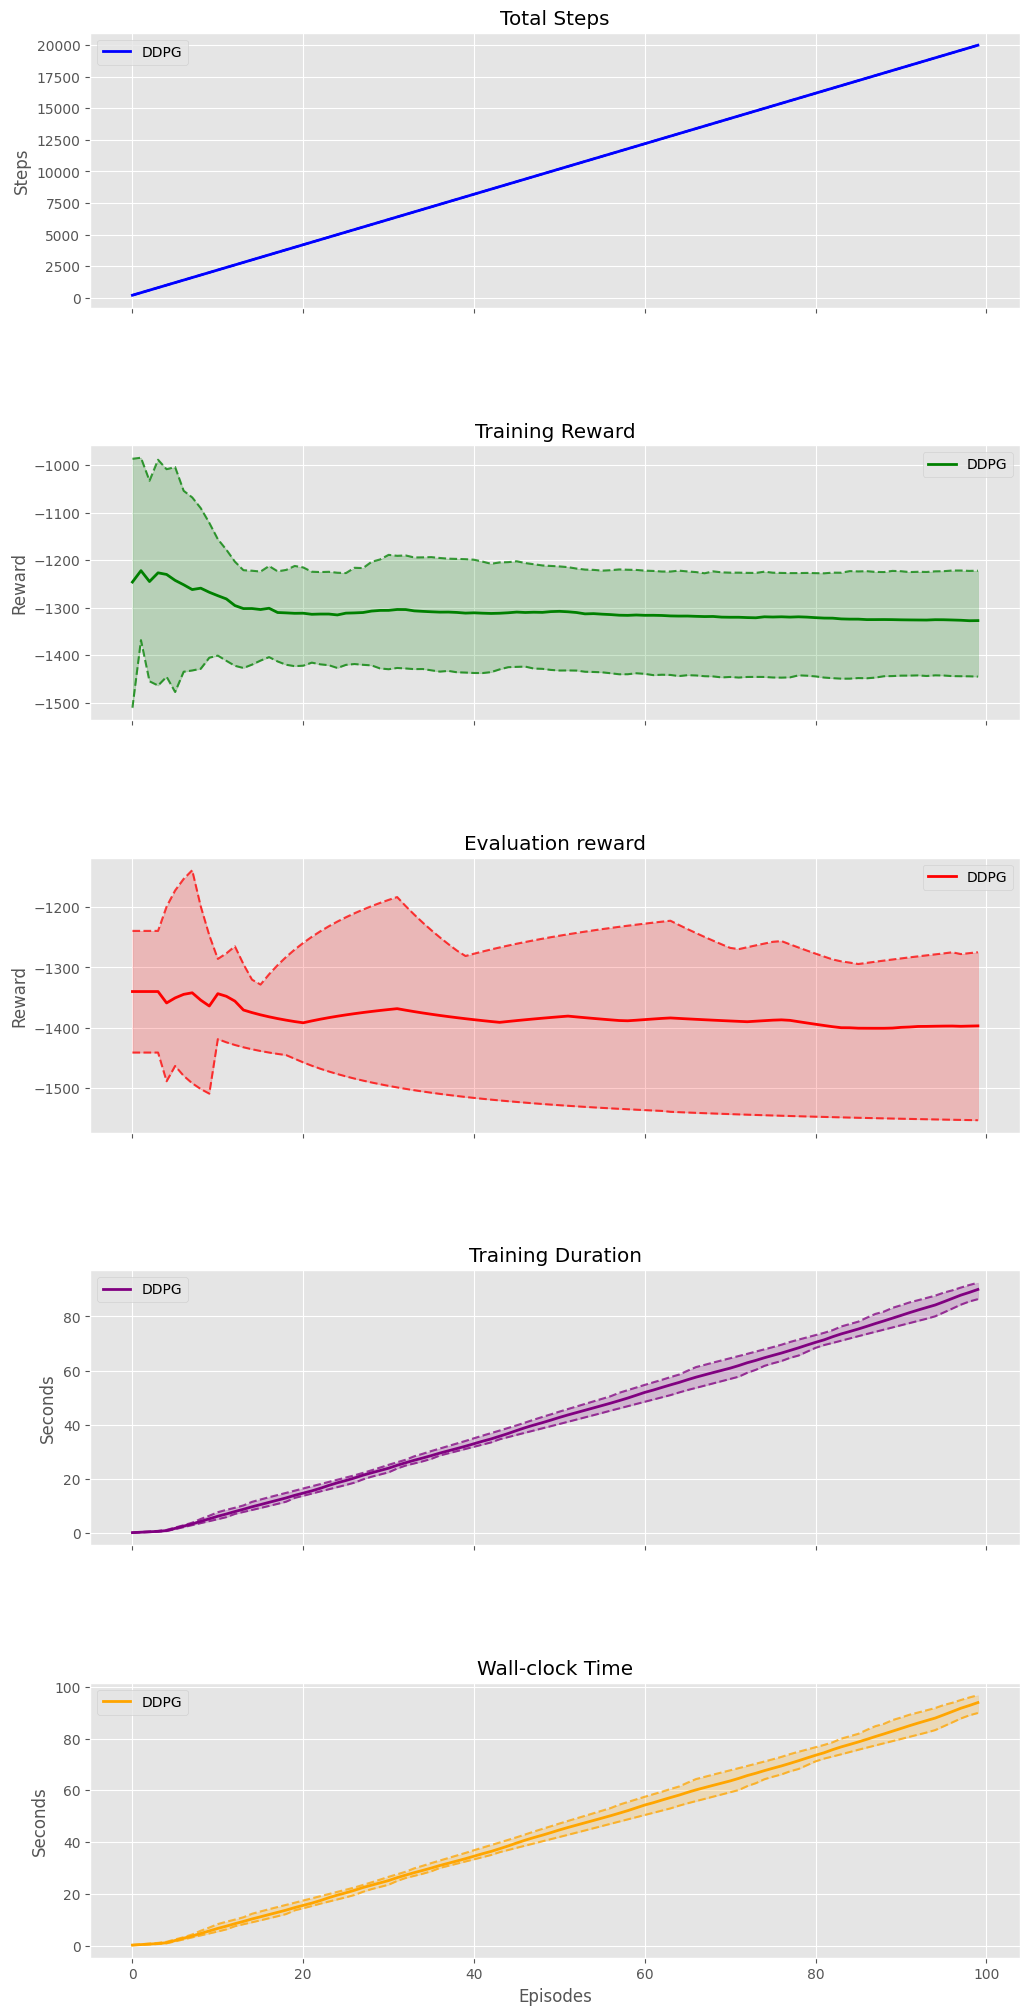

In [ ]:
reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max = np.max(ddpg_results, axis=0).T
reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min = np.min(ddpg_results, axis=0).T
reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg = np.mean(ddpg_results, axis=0).T
episode_indices = np.arange(len(reward_avg))

plt.style.use('ggplot')
fig, plot_areas = plt.subplots(5, 1, figsize=(12, 25), sharex='col')
fig.subplots_adjust(hspace=0.5)
colors = ['blue', 'green', 'red', 'purple', 'orange']
titles = ['Total Steps','Training Reward', 'Evaluation reward',  'Training Duration', 'Wall-clock Time']
y_labels = ['Steps', 'Reward', 'Reward', 'Seconds', 'Seconds']
data_max = [reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max]
data_min = [reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min]
data_avg = [reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg]

# Generate plots
for ax, title, color, max_data, min_data, avg_data, y_label in zip(plot_areas, titles, colors, data_max, data_min, data_avg, y_labels):
    ax.plot(max_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(min_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(avg_data, label='DDPG', color=color, linewidth=2)
    ax.fill_between(episode_indices, min_data, max_data, color=color, alpha=0.2)
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.legend()

plot_areas[-1].set_xlabel('Episodes')

plt.savefig('ddpg_pendulum_plots.png', format='png', dpi=300)
plt.show()


## DDPG for Hopper-v4 environment

In [ ]:
train_count = 0
ddpg_results = []
best_agent, best_eval_score = None, float('-inf')
seed_list = [3, 6, 7, 14, 17]

for myseed in seed_list:

    val_optimizer_fn = lambda net, lr: optim.RMSprop(net.parameters(), lr=lr)
    pol_optimizer_fn = lambda net, lr: optim.RMSprop(net.parameters(), lr=lr)

    # Instantiation of the DQN class
    ddpg_instance = DDPG(
        env_id='Hopper-v4',
        seed=myseed,
        gamma=0.99,
        tau = 0.8,
        epochs = 15,
        bufferSize=60000,
        batchSize=5,
        updateFrequency = 20,
        valueOptimizerFn=val_optimizer_fn,
        valueOptimizerLR=1e-3,
        policyOptimizerFn=pol_optimizer_fn,
        policyOptimizerLR=1e-3,
        MAX_TRAIN_EPISODES=150,
        MAX_EVAL_EPISODES=5
    )

    # Running the NFQ method and appending results
    trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, final_eval_score = ddpg_instance.runDDPG()
    ddpg_results.append(trainRewardsList)
    if final_eval_score > best_eval_score:
        best_eval_score = final_eval_score
        best_agent = ddpg_instance

# Convert dqn_results to a numpy array for any further processing
ddpg_results = np.array(ddpg_results)

 13%|█▎        | 20/150 [00:00<00:03, 34.42it/s]

100%|██████████| 150/150 [00:17<00:00,  8.45it/s]


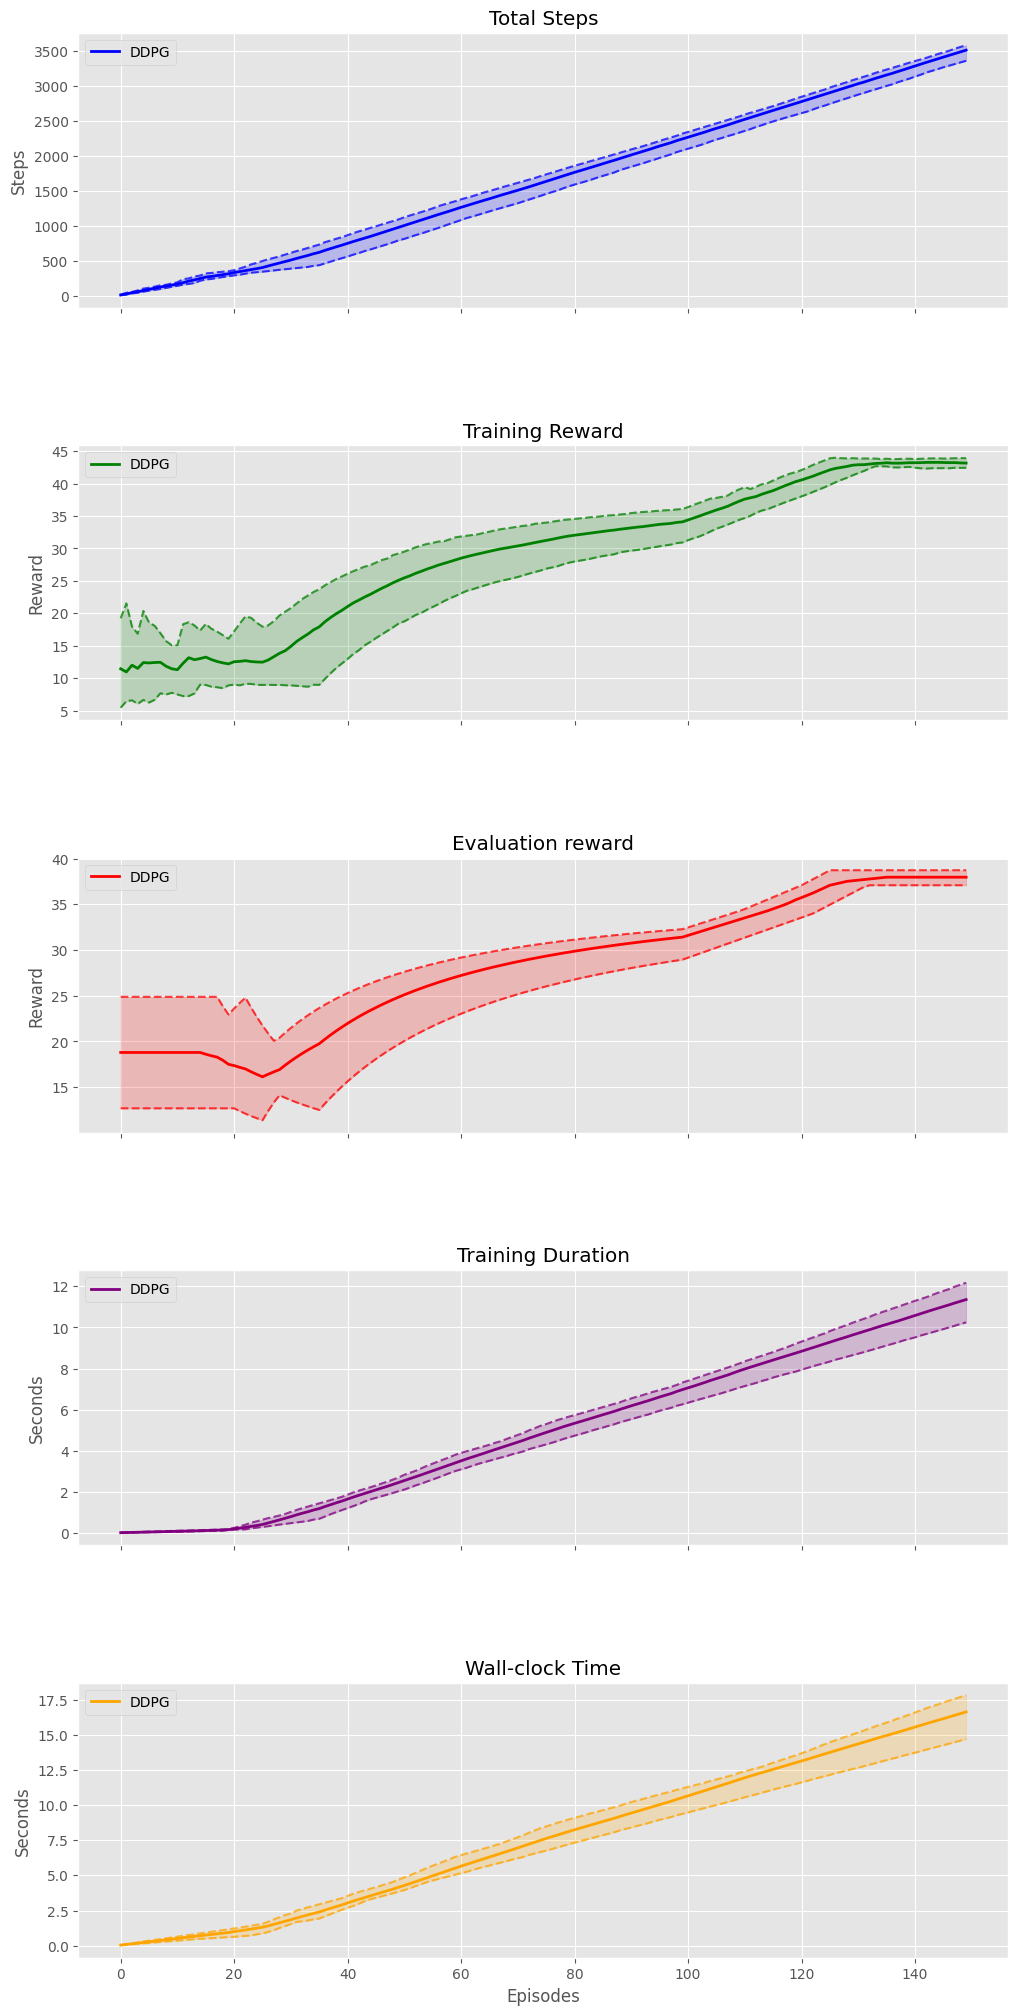

In [ ]:
reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max = np.max(ddpg_results, axis=0).T
reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min = np.min(ddpg_results, axis=0).T
reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg = np.mean(ddpg_results, axis=0).T
episode_indices = np.arange(len(reward_avg))

plt.style.use('ggplot')
fig, plot_areas = plt.subplots(5, 1, figsize=(12, 25), sharex='col')
fig.subplots_adjust(hspace=0.5)
colors = ['blue', 'green', 'red', 'purple', 'orange']
titles = ['Total Steps','Training Reward', 'Evaluation reward',  'Training Duration', 'Wall-clock Time']
y_labels = ['Steps', 'Reward', 'Reward', 'Seconds', 'Seconds']
data_max = [reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max]
data_min = [reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min]
data_avg = [reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg]

# Generate plots
for ax, title, color, max_data, min_data, avg_data, y_label in zip(plot_areas, titles, colors, data_max, data_min, data_avg, y_labels):
    ax.plot(max_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(min_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(avg_data, label='DDPG', color=color, linewidth=2)
    ax.fill_between(episode_indices, min_data, max_data, color=color, alpha=0.2)
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.legend()

plot_areas[-1].set_xlabel('Episodes')
plt.savefig('ddpg_hopper_plots.png', format='png', dpi=300)
plt.show()


## DDPG for Half-Cheetah environment

In [ ]:
train_count = 0
ddpg_results = []
best_agent, best_eval_score = None, float('-inf')
seed_list = [20, 50, 9, 10, 12]

for myseed in seed_list:

    val_optimizer_fn = lambda net, lr: optim.Adam(net.parameters(), lr=lr)
    pol_optimizer_fn = lambda net, lr: optim.Adam(net.parameters(), lr=lr)

    # Instantiation of the DQN class
    ddpg_instance = DDPG(
        env_id='HalfCheetah-v4',
        seed=myseed,
        gamma=0.99,
        tau = 0.8,
        epochs = 20,
        bufferSize=60000,
        batchSize=15,
        updateFrequency = 20,
        valueOptimizerFn=val_optimizer_fn,
        valueOptimizerLR=2e-3,
        policyOptimizerFn=pol_optimizer_fn,
        policyOptimizerLR=1e-3,
        MAX_TRAIN_EPISODES=100,
        MAX_EVAL_EPISODES=1
    )

    # Running the NFQ method and appending results
    trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, final_eval_score = ddpg_instance.runDDPG()
    ddpg_results.append(trainRewardsList)
    if final_eval_score > best_eval_score:
        best_eval_score = final_eval_score
        best_agent = ddpg_instance

# Convert dqn_results to a numpy array for any further processing
ddpg_results = np.array(ddpg_results)

100%|██████████| 100/100 [14:03<00:00,  8.44s/it]


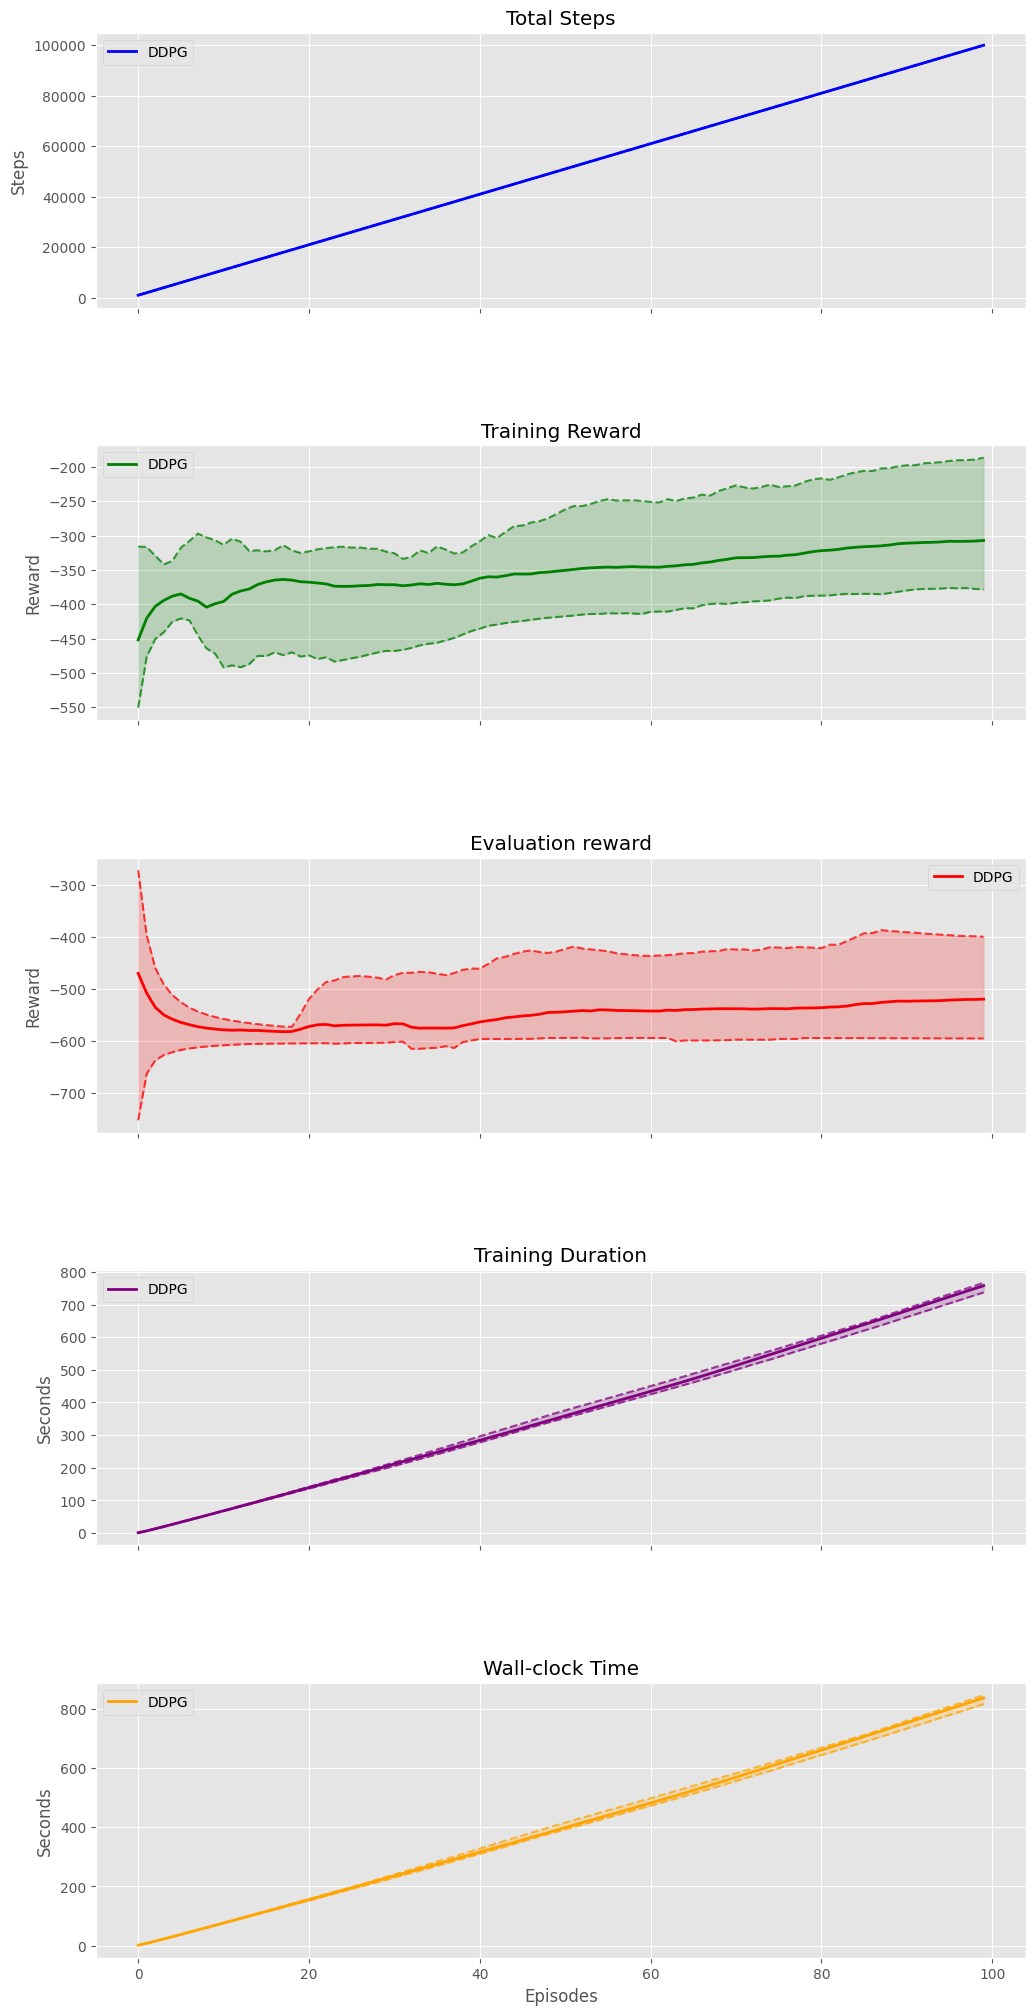

In [ ]:
reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max = np.max(ddpg_results, axis=0).T
reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min = np.min(ddpg_results, axis=0).T
reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg = np.mean(ddpg_results, axis=0).T
episode_indices = np.arange(len(reward_avg))

plt.style.use('ggplot')
fig, plot_areas = plt.subplots(5, 1, figsize=(12, 25), sharex='col')
fig.subplots_adjust(hspace=0.5)
colors = ['blue', 'green', 'red', 'purple', 'orange']
titles = ['Total Steps','Training Reward', 'Evaluation reward',  'Training Duration', 'Wall-clock Time']
y_labels = ['Steps', 'Reward', 'Reward', 'Seconds', 'Seconds']
data_max = [reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max]
data_min = [reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min]
data_avg = [reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg]

# Generate plots
for ax, title, color, max_data, min_data, avg_data, y_label in zip(plot_areas, titles, colors, data_max, data_min, data_avg, y_labels):
    ax.plot(max_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(min_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(avg_data, label='DDPG', color=color, linewidth=2)
    ax.fill_between(episode_indices, min_data, max_data, color=color, alpha=0.2)
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.legend()

plot_areas[-1].set_xlabel('Episodes')
plt.savefig('ddpg_halfcheetah_plots.png', format='png', dpi=300)
plt.show()


## TD3 for Pendulum-v1 environment

In [ ]:
train_count = 0
td3_results = []
best_agent, best_eval_score = None, float('-inf')
seed_list = [1, 6, 7, 14, 17]

for myseed in seed_list:

    val_optimizer_fn = lambda net, lr: optim.RMSprop(net.parameters(), lr=lr)
    pol_optimizer_fn = lambda net, lr: optim.RMSprop(net.parameters(), lr=lr)

    # Instantiation of the TD3 class
    td3_instance = TD3(
        env_id='Pendulum-v1',
        seed=myseed,
        gamma=0.99,
        tau = 0.8,
        epochs = 15,
        bufferSize=50000,
        batchSize=5,
        updateFrequencyPolicy = 1,
        updateFrequencyValue = 3,
        trainPolicyFrequency = 2,
        valueOptimizerFn=val_optimizer_fn,
        valueOptimizerLR=1e-3,
        policyOptimizerFn=pol_optimizer_fn,
        policyOptimizerLR=1e-3,
        MAX_TRAIN_EPISODES=100,
        MAX_EVAL_EPISODES=1
    )

    # Running the NFQ method and appending results
    trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, final_eval_score = td3_instance.runTD3()
    td3_results.append(trainRewardsList)
    if final_eval_score > best_eval_score:
        best_eval_score = final_eval_score
        best_agent = td3_instance

# Convert dqn_results to a numpy array for any further processing
td3_results = np.array(td3_results)

100%|██████████| 100/100 [01:09<00:00,  1.44it/s]


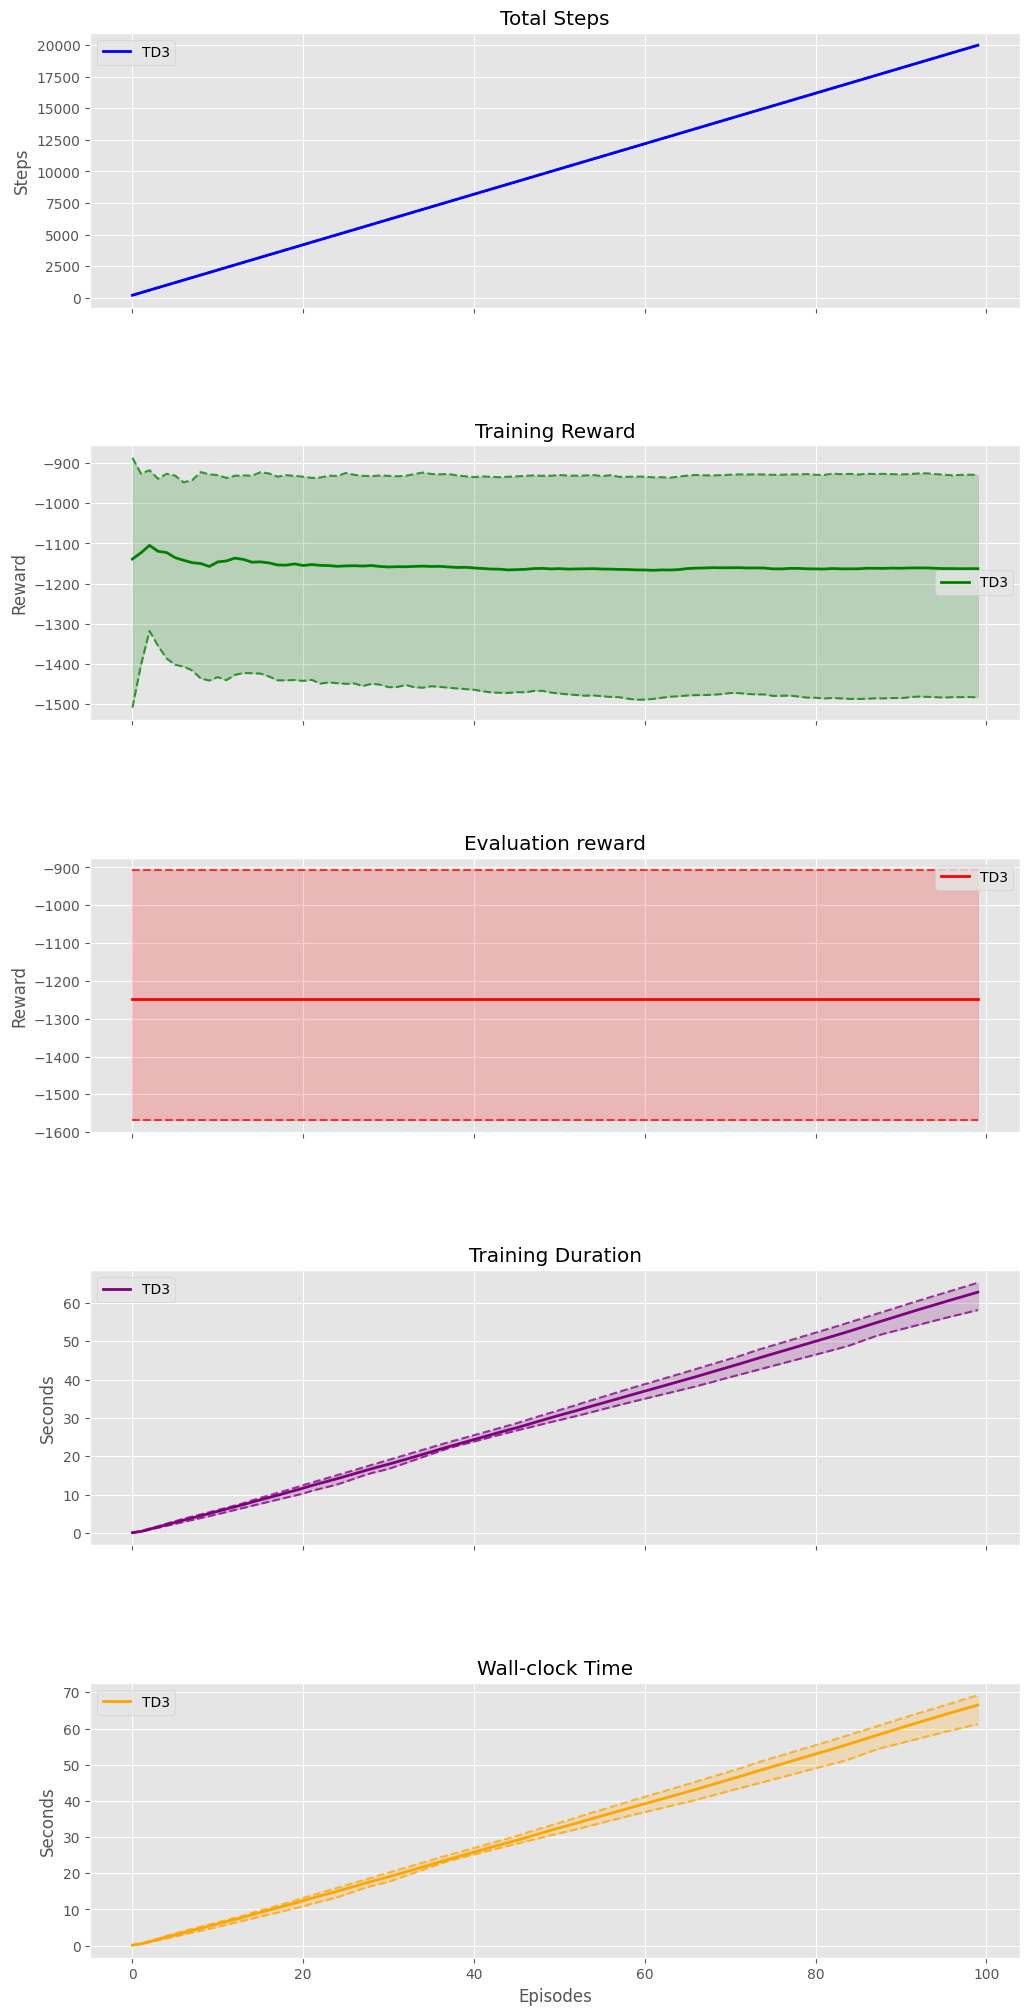

In [ ]:
reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max = np.max(td3_results, axis=0).T
reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min = np.min(td3_results, axis=0).T
reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg = np.mean(td3_results, axis=0).T
episode_indices = np.arange(len(reward_avg))

plt.style.use('ggplot')
fig, plot_areas = plt.subplots(5, 1, figsize=(12, 25), sharex='col')
fig.subplots_adjust(hspace=0.5)
colors = ['blue', 'green', 'red', 'purple', 'orange']
titles = ['Total Steps','Training Reward', 'Evaluation reward',  'Training Duration', 'Wall-clock Time']
y_labels = ['Steps', 'Reward', 'Reward', 'Seconds', 'Seconds']
data_max = [reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max]
data_min = [reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min]
data_avg = [reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg]

# Generate plots
for ax, title, color, max_data, min_data, avg_data, y_label in zip(plot_areas, titles, colors, data_max, data_min, data_avg, y_labels):
    ax.plot(max_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(min_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(avg_data, label='TD3', color=color, linewidth=2)
    ax.fill_between(episode_indices, min_data, max_data, color=color, alpha=0.2)
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.legend()

plot_areas[-1].set_xlabel('Episodes')
plt.savefig('td3_pendulum_plots.png', format='png', dpi=300)
plt.show()


## TD3 for Hopper-v4 environment

In [ ]:
train_count = 0
td3_results = []
best_agent, best_eval_score = None, float('-inf')
seed_list = [1, 4, 5, 10, 20]

for myseed in seed_list:

    val_optimizer_fn = lambda net, lr: optim.Adam(net.parameters(), lr=lr)
    pol_optimizer_fn = lambda net, lr: optim.Adam(net.parameters(), lr=lr)

    # Instantiation of the TD3 class
    td3_instance = TD3(
        env_id='Hopper-v4',
        seed=myseed,
        gamma=0.99,
        tau = 0.8,
        epochs = 15,
        bufferSize=60000,
        batchSize=5,
        updateFrequencyValue = 4,
        updateFrequencyPolicy = 2,
        trainPolicyFrequency = 2,
        policyOptimizerFn = pol_optimizer_fn,
        valueOptimizerFn = val_optimizer_fn,
        valueOptimizerLR = 2e-3,
        policyOptimizerLR = 1e-3,
        MAX_TRAIN_EPISODES=200,
        MAX_EVAL_EPISODES=1
    )

    # Running the NFQ method and appending results
    trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, final_eval_score = td3_instance.runTD3()
    td3_results.append(trainRewardsList)
    if final_eval_score > best_eval_score:
        best_eval_score = final_eval_score
        best_agent = td3_instance

# Convert dqn_results to a numpy array for any further processing
td3_results = np.array(td3_results)

100%|██████████| 200/200 [00:20<00:00,  9.64it/s]


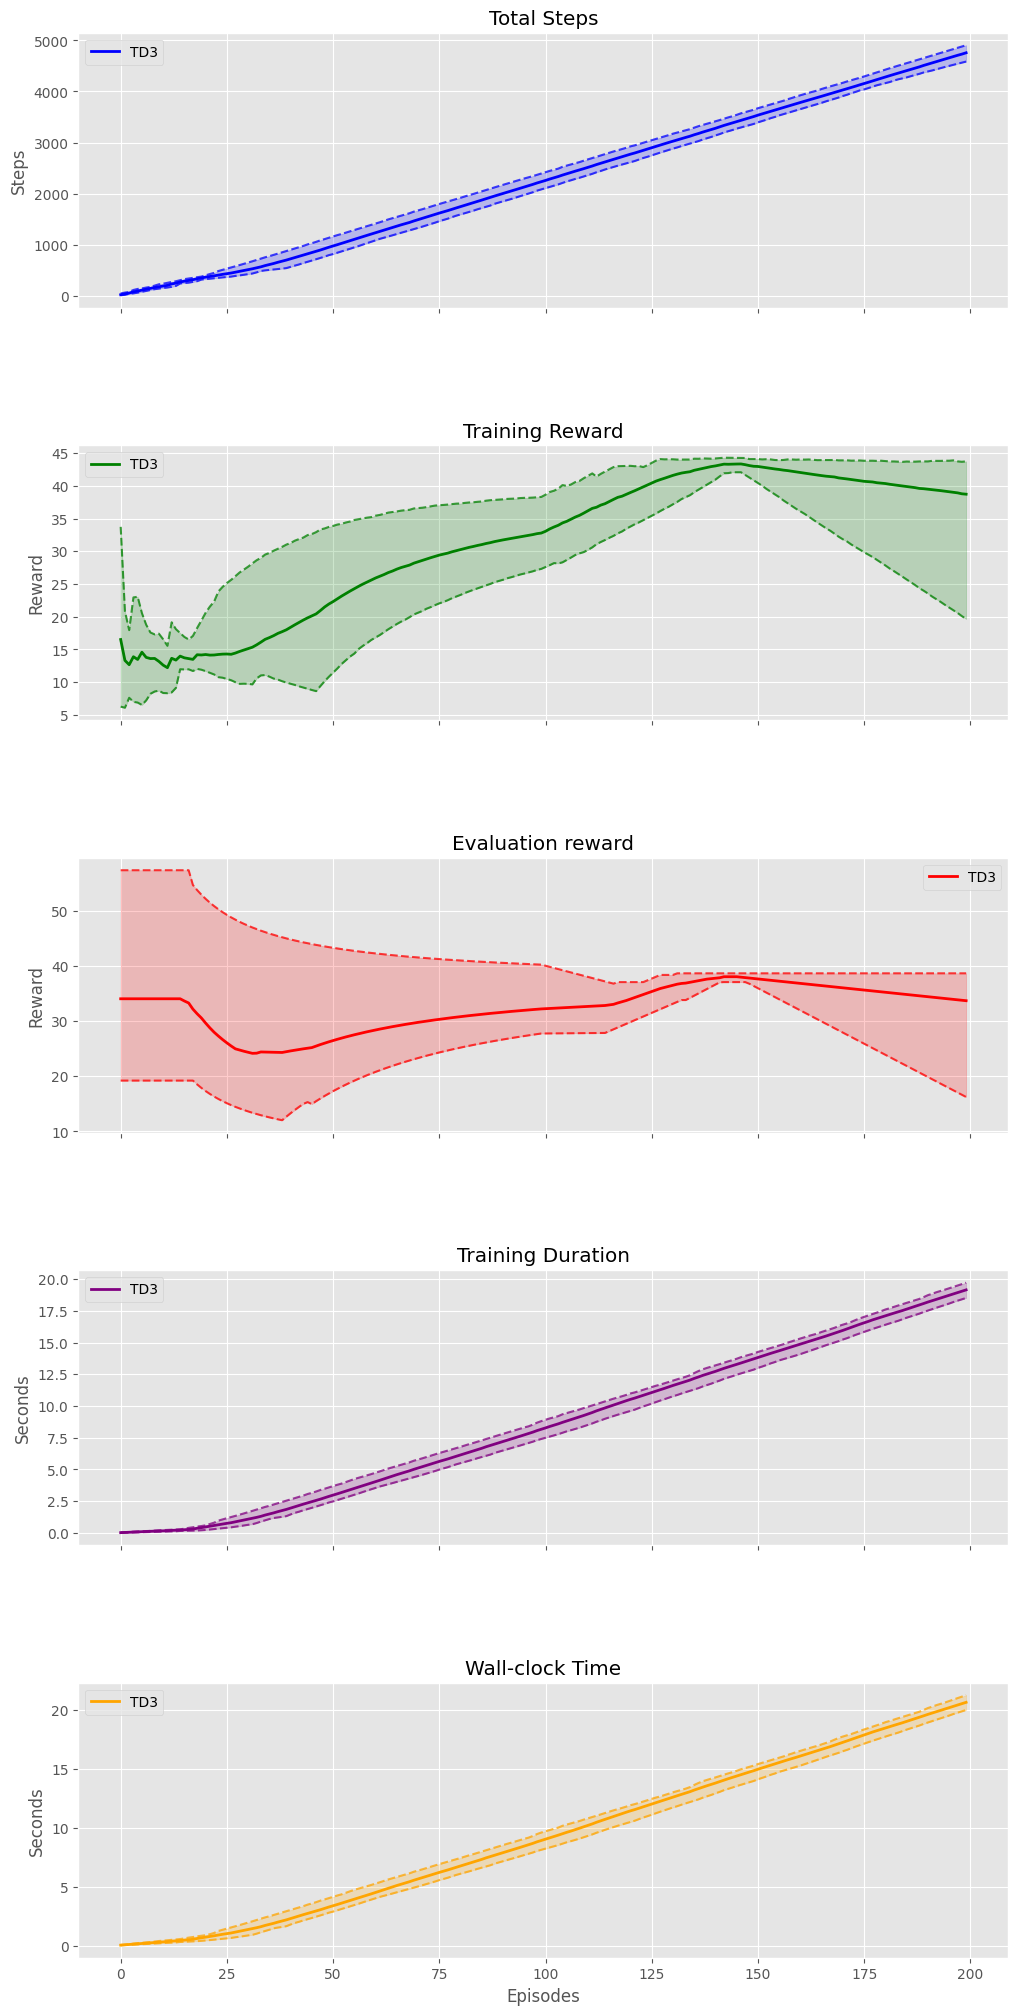

In [ ]:
reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max = np.max(td3_results, axis=0).T
reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min = np.min(td3_results, axis=0).T
reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg = np.mean(td3_results, axis=0).T
episode_indices = np.arange(len(reward_avg))

plt.style.use('ggplot')
fig, plot_areas = plt.subplots(5, 1, figsize=(12, 25), sharex='col')
fig.subplots_adjust(hspace=0.5)
colors = ['blue', 'green', 'red', 'purple', 'orange']
titles = ['Total Steps','Training Reward', 'Evaluation reward',  'Training Duration', 'Wall-clock Time']
y_labels = ['Steps', 'Reward', 'Reward', 'Seconds', 'Seconds']
data_max = [reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max]
data_min = [reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min]
data_avg = [reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg]

# Generate plots
for ax, title, color, max_data, min_data, avg_data, y_label in zip(plot_areas, titles, colors, data_max, data_min, data_avg, y_labels):
    ax.plot(max_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(min_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(avg_data, label='TD3', color=color, linewidth=2)
    ax.fill_between(episode_indices, min_data, max_data, color=color, alpha=0.2)
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.legend()

plot_areas[-1].set_xlabel('Episodes')
plt.savefig('td3_hopper_plots.png', format='png', dpi=300)
plt.show()


## TD3 for Half Cheetah environment

In [ ]:
train_count = 0
td3_results = []
best_agent, best_eval_score = None, float('-inf')
seed_list = [2, 5, 9, 10, 16]

for myseed in seed_list:

    val_optimizer_fn = lambda net, lr: optim.RMSprop(net.parameters(), lr=lr)
    pol_optimizer_fn = lambda net, lr: optim.RMSprop(net.parameters(), lr=lr)

    # Instantiation of the TD3 class
    td3_instance = TD3(
        env_id='HalfCheetah-v4',
        seed=myseed,
        gamma=0.99,
        tau = 0.9,
        epochs = 15,
        bufferSize=50000,
        batchSize=5,
        updateFrequencyPolicy = 2,
        updateFrequencyValue = 2,
        trainPolicyFrequency = 2,
        valueOptimizerFn=val_optimizer_fn,
        valueOptimizerLR=1e-3,
        policyOptimizerFn=pol_optimizer_fn,
        policyOptimizerLR=1e-3,
        MAX_TRAIN_EPISODES=150,
        MAX_EVAL_EPISODES=1)

    # Running the NFQ method and appending results
    trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, final_eval_score = td3_instance.runTD3()
    td3_results.append(trainRewardsList)
    if final_eval_score > best_eval_score:
        best_eval_score = final_eval_score
        best_agent = td3_instance

# Convert dqn_results to a numpy array for any further processing
td3_results = np.array(td3_results)

  0%|          | 0/150 [00:00<?, ?it/s]

100%|██████████| 150/150 [14:28<00:00,  5.79s/it]


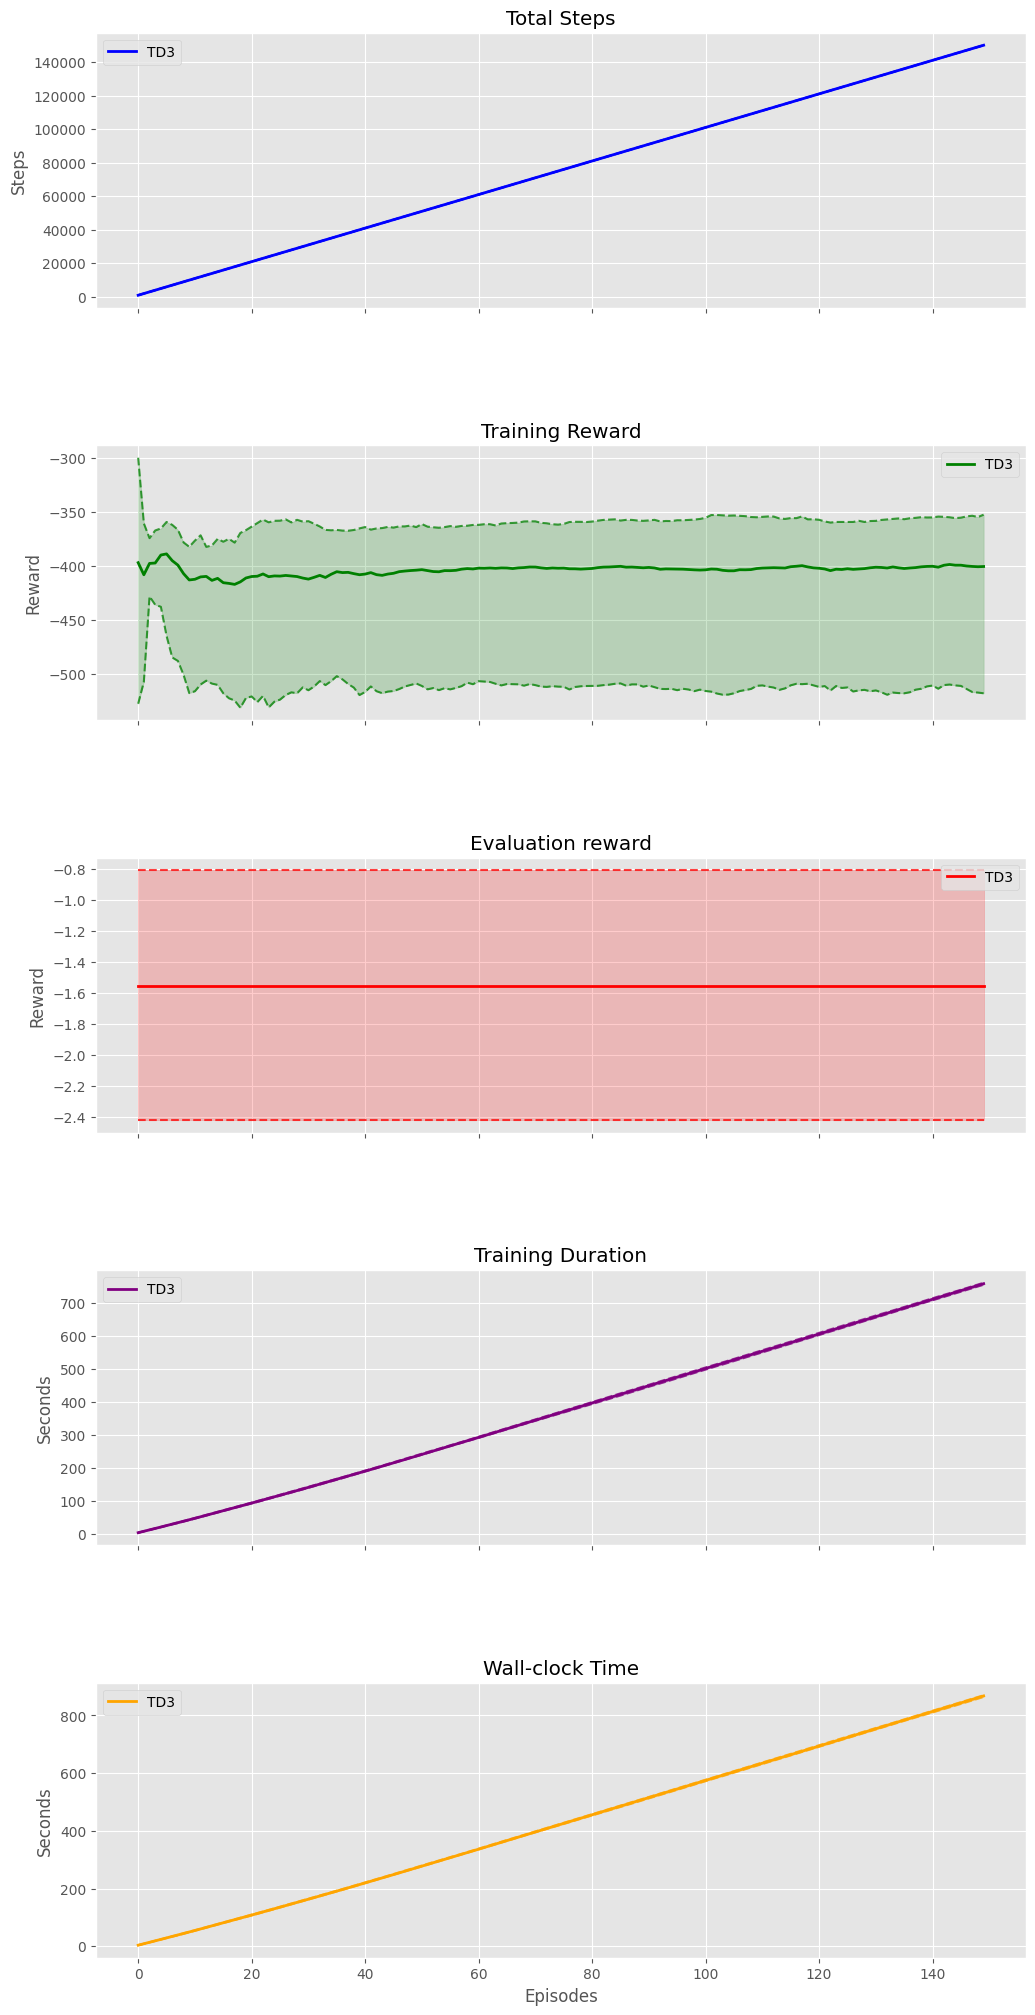

In [ ]:
reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max = np.max(td3_results, axis=0).T
reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min = np.min(td3_results, axis=0).T
reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg = np.mean(td3_results, axis=0).T
episode_indices = np.arange(len(reward_avg))

plt.style.use('ggplot')
fig, plot_areas = plt.subplots(5, 1, figsize=(12, 25), sharex='col')
fig.subplots_adjust(hspace=0.5)
colors = ['blue', 'green', 'red', 'purple', 'orange']
titles = ['Total Steps','Training Reward', 'Evaluation reward',  'Training Duration', 'Wall-clock Time']
y_labels = ['Steps', 'Reward', 'Reward', 'Seconds', 'Seconds']
data_max = [reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max]
data_min = [reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min]
data_avg = [reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg]

# Generate plots
for ax, title, color, max_data, min_data, avg_data, y_label in zip(plot_areas, titles, colors, data_max, data_min, data_avg, y_labels):
    ax.plot(max_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(min_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(avg_data, label='TD3', color=color, linewidth=2)
    ax.fill_between(episode_indices, min_data, max_data, color=color, alpha=0.2)
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.legend()

plot_areas[-1].set_xlabel('Episodes')
plt.savefig('td3_halfcheetah_plots.png', format='png', dpi=300)
plt.show()


## PPO for Pendulum-v1 environment

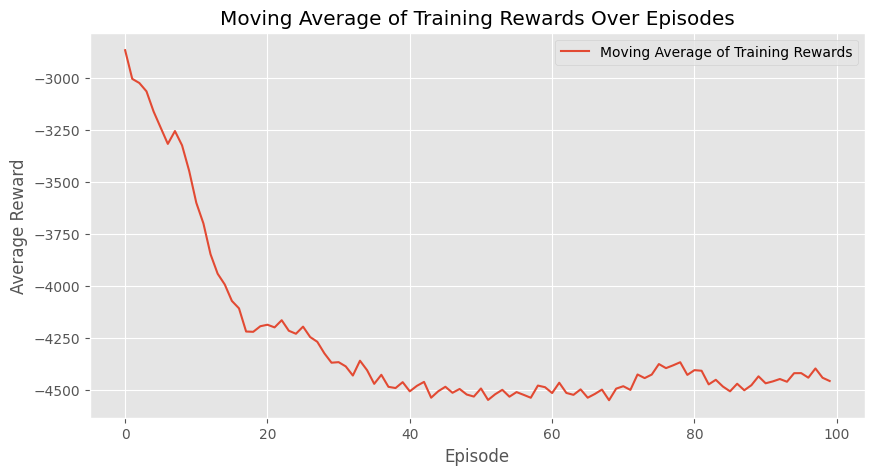

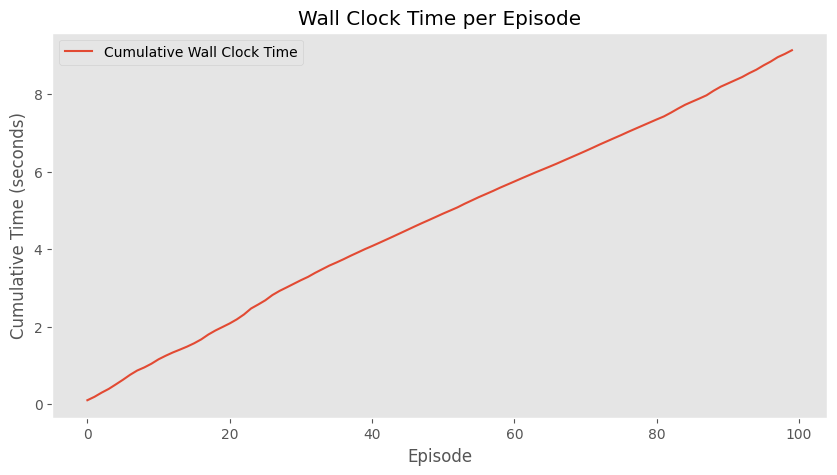

In [ ]:

# Plot the moving average of training rewards
plt.figure(figsize=(10, 5))
plt.plot(moving_avg_rewards, label='Moving Average of Training Rewards')
plt.title('Moving Average of Training Rewards Over Episodes')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.legend()

plt.savefig('ppo_pendulum_train_rewards.png', format='png', dpi=300)
plt.show()

# Plot wall clock time
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(wall_clock_times), label='Cumulative Wall Clock Time')
plt.title('Wall Clock Time per Episode')
plt.xlabel('Episode')
plt.ylabel('Cumulative Time (seconds)')
plt.legend()
plt.grid()

plt.savefig('ppo_pendulum_clocktimes.png', format='png', dpi=300)
plt.show()


## Question 6

Based on the observations between plots of __DDPG__ and __TD3__ algorithms, __TD3__ seems to perform better than __DDPG__ for the __Hopper-v4__ environment. The curves show that both the training and evaluation rewards initially increases and then attains a stationary region over the episodes and then starts to decrease. The plots of the two models for the case of __Half-Cheetah__ environment doesn't seem to increase over the course of episodes which might be due to hyperparameter tuning.

## Question 7

__PPO__ has several advantages over __DDPG__ and __TD3__ algorthim. Firstly, it uses a clipped surrogate objective function which simplifies the training process. The clipping action limits the size of policy updates, promoting gradual updates to policy and a stable learning. On the other hand. both __DDPG__ and __TD3__ use an off-policy approach that requires careful desing of exploration strategies.

__Proximal Policy Optimization__ also shows high robustness across a variety of gym environments ranging from discrete to continuous action spaces whereas __DDPG__ and __TD3__ are specifically tailored for continuous action spaces. Also since these two models uses deterministic policies, they require the addition of noise factor to enable exploration.